# CCCCCCCCCCCCCC

In [79]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", module="matplotlib")
#显示所有行列
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 选取需要的列 按“入院首次检查流水号"拼成一个大表 保留前100行
df1 = pd.read_excel("表1-患者列表及临床信息.xlsx")
df2 = pd.read_excel("表2-患者影像信息血肿及水肿的体积及位置.xlsx")
df3 = pd.read_excel("附表1-检索表格-流水号vs时间New.xlsx")

df1 = pd.concat([df1["入院首次检查流水号"],df1["发病到首次影像检查时间间隔"]],axis=1)
df2 = pd.concat([df2["入院首次检查流水号"],df2["ED_volume0"],df2["ED_volume1"],df2["ED_volume2"],df2["ED_volume3"],df2["ED_volume4"],df2["ED_volume5"],df2["ED_volume6"],df2["ED_volume7"],df2["ED_volume8"]],axis=1)
df3 = pd.concat([df3["入院首次检查流水号"],df3["入院首次检查时间点"],df3["随访1时间点"],df3["随访2时间点"],df3["随访3时间点"],df3["随访4时间点"],df3["随访5时间点"],df3["随访6时间点"],df3["随访7时间点"],df3["随访8时间点"]],axis=1)

df=pd.merge(df1,df2,on=['入院首次检查流水号'])
df=pd.merge(df,df3,on=['入院首次检查流水号'])
df=df.head(100)
df

,入院首次检查流水号,发病到首次影像检查时间间隔,ED_volume0,ED_volume1,ED_volume2,ED_volume3,ED_volume4,ED_volume5,ED_volume6,ED_volume7,ED_volume8,入院首次检查时间点,随访1时间点,随访2时间点,随访3时间点,随访4时间点,随访5时间点,随访6时间点,随访7时间点,随访8时间点
0,20161212002136,2.50,48919,57898.0,81747.0,107793.0,126558.0,NaN,NaN,NaN,NaN,2016-12-12 23:32:54,2016-12-13 05:19:00,2016-12-18 09:09:24,2016-12-23 16:47:09,2016-12-30 14:35:12,NaT,NaT,NaT,NaT
1,20160406002131,3.00,23526,23390.0,28415.0,34868.0,0.0,NaN,NaN,NaN,NaN,2016-04-06 21:21:03,2016-04-07 09:16:27,2016-04-09 15:34:22,2016-04-25 10:22:02,2016-05-23 09:32:34,NaT,NaT,NaT,NaT
2,20160413000006,2.00,32621,41292.0,49767.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-13 01:18:17,2016-04-13 08:49:38,2016-04-14 14:54:02,NaT,NaT,NaT,NaT,NaT,NaT
3,20160413000006,2.00,21562,36582.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-13 01:18:17,2016-04-13 08:49:38,2016-04-14 14:54:02,NaT,NaT,NaT,NaT,NaT,NaT
4,20160413000006,2.00,32621,41292.0,49767.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-13 01:18:17,2016-04-13 08:49:38,2016-04-14 14:54:02,NaT,NaT,NaT,NaT,NaT,NaT
5,20160413000006,2.00,21562,36582.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-13 01:18:17,2016-04-13 08:49:38,2016-04-14 14:54:02,NaT,NaT,NaT,NaT,NaT,NaT
6,20161215001667,1.00,22191,18956.0,9540.0,5204.0,NaN,NaN,NaN,NaN,NaN,2016-12-15 22:53:41,2016-12-16 14:52:08,2016-12-19 09:44:24,2016-12-25 09:23:45,NaT,NaT,NaT,NaT,NaT
7,20161215001667,1.00,7300,17429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-15 22:53:41,2016-12-16 14:52:08,2016-12-19 09:44:24,2016-12-25 09:23:45,NaT,NaT,NaT,NaT,NaT
8,20161215001667,1.00,22191,18956.0,9540.0,5204.0,NaN,NaN,NaN,NaN,NaN,2016-12-15 22:53:41,2016-12-16 14:52:08,2016-12-19 09:44:24,2016-12-25 09:23:45,NaT,NaT,NaT,NaT,NaT
9,20161215001667,1.00,7300,17429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-15 22:53:41,2016-12-16 14:52:08,2016-12-19 09:44:24,2016-12-25 09:23:45,NaT,NaT,NaT,NaT,NaT


In [80]:
# 计算8次随访与首次影像检查的时间间隔 以小时为单位(61号病人达到惊人的13次随访 过于离谱 属于奇异值 因而只统计8次随访记录 已经涵盖99%的人群了)
df['入院首次检查时间点'] = pd.to_datetime(df['入院首次检查时间点'])
df['随访1时间点'] = pd.to_datetime(df['随访1时间点'])
df['发病到随访1时间点时间间隔'] = (df['随访1时间点'] - df['入院首次检查时间点']).dt.total_seconds() / 3600 + df["发病到首次影像检查时间间隔"]

df['随访2时间点'] = pd.to_datetime(df['随访2时间点'])
df['发病到随访2时间点时间间隔'] = (df['随访2时间点'] - df['随访1时间点']).dt.total_seconds() / 3600 + df["发病到随访1时间点时间间隔"]

df['随访3时间点'] = pd.to_datetime(df['随访3时间点'])
df['发病到随访3时间点时间间隔'] = (df['随访3时间点'] - df['随访2时间点']).dt.total_seconds() / 3600 + df["发病到随访2时间点时间间隔"]

df['随访4时间点'] = pd.to_datetime(df['随访4时间点'])
df['发病到随访4时间点时间间隔'] = (df['随访4时间点'] - df['随访3时间点']).dt.total_seconds() / 3600 + df["发病到随访3时间点时间间隔"]

df['随访5时间点'] = pd.to_datetime(df['随访5时间点'])
df['发病到随访5时间点时间间隔'] = (df['随访5时间点'] - df['随访4时间点']).dt.total_seconds() / 3600 + df["发病到随访4时间点时间间隔"]

df['随访6时间点'] = pd.to_datetime(df['随访6时间点'])
df['发病到随访6时间点时间间隔'] = (df['随访6时间点'] - df['随访5时间点']).dt.total_seconds() / 3600 + df["发病到随访5时间点时间间隔"]

df['随访7时间点'] = pd.to_datetime(df['随访7时间点'])
df['发病到随访7时间点时间间隔'] = (df['随访7时间点'] - df['随访6时间点']).dt.total_seconds() / 3600 + df["发病到随访6时间点时间间隔"]

df['随访8时间点'] = pd.to_datetime(df['随访8时间点'])
df['发病到随访8时间点时间间隔'] = (df['随访8时间点'] - df['随访7时间点']).dt.total_seconds() / 3600 + df["发病到随访7时间点时间间隔"]

# res = pd.concat([df.iloc[:, 0:11],df.iloc[:, 20:28]],axis=1)
res = pd.concat([df["入院首次检查流水号"],
          df["发病到首次影像检查时间间隔"],df["ED_volume0"],
          df["发病到随访1时间点时间间隔"],df["ED_volume1"],
          df["发病到随访2时间点时间间隔"],df["ED_volume2"],
          df["发病到随访3时间点时间间隔"],df["ED_volume3"],
          df["发病到随访4时间点时间间隔"],df["ED_volume4"],
          df["发病到随访5时间点时间间隔"],df["ED_volume5"],
          df["发病到随访6时间点时间间隔"],df["ED_volume6"],
          df["发病到随访7时间点时间间隔"],df["ED_volume7"],
          df["发病到随访8时间点时间间隔"],df["ED_volume8"],
          ],axis=1)
res

,入院首次检查流水号,发病到首次影像检查时间间隔,ED_volume0,发病到随访1时间点时间间隔,ED_volume1,发病到随访2时间点时间间隔,ED_volume2,发病到随访3时间点时间间隔,ED_volume3,发病到随访4时间点时间间隔,ED_volume4,发病到随访5时间点时间间隔,ED_volume5,发病到随访6时间点时间间隔,ED_volume6,发病到随访7时间点时间间隔,ED_volume7,发病到随访8时间点时间间隔,ED_volume8
0,20161212002136,2.50,48919,8.268333,57898.0,132.108333,81747.0,259.737500,107793.0,425.538333,126558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20160406002131,3.00,23526,14.923333,23390.0,69.221944,28415.0,448.016389,34868.0,1119.191944,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20160413000006,2.00,32621,9.522500,41292.0,39.595833,49767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20160413000006,2.00,21562,9.522500,36582.0,39.595833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20160413000006,2.00,32621,9.522500,41292.0,39.595833,49767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20160413000006,2.00,21562,9.522500,36582.0,39.595833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20161215001667,1.00,22191,16.974167,18956.0,83.845278,9540.0,227.501111,5204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20161215001667,1.00,7300,16.974167,17429.0,83.845278,NaN,227.501111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20161215001667,1.00,22191,16.974167,18956.0,83.845278,9540.0,227.501111,5204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,20161215001667,1.00,7300,16.974167,17429.0,83.845278,NaN,227.501111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
res["speed1"]=(res["ED_volume1"]-res["ED_volume0"])/(res["发病到随访1时间点时间间隔"]-res["发病到首次影像检查时间间隔"])
res["speed2"]=(res["ED_volume2"]-res["ED_volume1"])/(res["发病到随访2时间点时间间隔"]-res["发病到随访1时间点时间间隔"])
res["speed3"]=(res["ED_volume3"]-res["ED_volume2"])/(res["发病到随访3时间点时间间隔"]-res["发病到随访2时间点时间间隔"])
res["speed4"]=(res["ED_volume4"]-res["ED_volume3"])/(res["发病到随访4时间点时间间隔"]-res["发病到随访3时间点时间间隔"])
res["speed5"]=(res["ED_volume5"]-res["ED_volume4"])/(res["发病到随访5时间点时间间隔"]-res["发病到随访4时间点时间间隔"])
res["speed6"]=(res["ED_volume6"]-res["ED_volume5"])/(res["发病到随访6时间点时间间隔"]-res["发病到随访5时间点时间间隔"])
res["speed7"]=(res["ED_volume7"]-res["ED_volume6"])/(res["发病到随访7时间点时间间隔"]-res["发病到随访6时间点时间间隔"])
res["speed8"]=(res["ED_volume8"]-res["ED_volume7"])/(res["发病到随访8时间点时间间隔"]-res["发病到随访7时间点时间间隔"])
res

,入院首次检查流水号,发病到首次影像检查时间间隔,ED_volume0,发病到随访1时间点时间间隔,ED_volume1,发病到随访2时间点时间间隔,ED_volume2,发病到随访3时间点时间间隔,ED_volume3,发病到随访4时间点时间间隔,ED_volume4,发病到随访5时间点时间间隔,ED_volume5,发病到随访6时间点时间间隔,ED_volume6,发病到随访7时间点时间间隔,ED_volume7,发病到随访8时间点时间间隔,ED_volume8,speed1,speed2,speed3,speed4,speed5,speed6,speed7,speed8
0,20161212002136,2.50,48919,8.268333,57898.0,132.108333,81747.0,259.737500,107793.0,425.538333,126558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1556.602138,192.579134,204.075610,113.177959,NaN,NaN,NaN,NaN
1,20160406002131,3.00,23526,14.923333,23390.0,69.221944,28415.0,448.016389,34868.0,1119.191944,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.406206,92.543804,17.035625,-51.950641,NaN,NaN,NaN,NaN
2,20160413000006,2.00,32621,9.522500,41292.0,39.595833,49767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1152.675307,281.811128,NaN,NaN,NaN,NaN,NaN,NaN
3,20160413000006,2.00,21562,9.522500,36582.0,39.595833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.676637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20160413000006,2.00,32621,9.522500,41292.0,39.595833,49767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1152.675307,281.811128,NaN,NaN,NaN,NaN,NaN,NaN
5,20160413000006,2.00,21562,9.522500,36582.0,39.595833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.676637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20161215001667,1.00,22191,16.974167,18956.0,83.845278,9540.0,227.501111,5204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-202.514476,-140.808188,-30.183250,NaN,NaN,NaN,NaN,NaN
7,20161215001667,1.00,7300,16.974167,17429.0,83.845278,NaN,227.501111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,634.086285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20161215001667,1.00,22191,16.974167,18956.0,83.845278,9540.0,227.501111,5204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-202.514476,-140.808188,-30.183250,NaN,NaN,NaN,NaN,NaN
9,20161215001667,1.00,7300,16.974167,17429.0,83.845278,NaN,227.501111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,634.086285,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
table1 = pd.read_excel("表1-患者列表及临床信息.xlsx")
table1

,Unnamed: 0,90天mRS,数据集划分,入院首次检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,发病到首次影像检查时间间隔,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,0,0,0,0,2.50,180/90,0,1,1,1,1,1,1
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,0,0,0,0,3.00,199/120,0,1,1,1,0,1,1
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,0,0,0,0,2.00,199/120,0,1,1,1,1,1,1
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,0,0,0,0,1.00,186/99,0,1,1,1,0,0,0
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,0,0,0,0,5.00,135/92,0,1,1,0,0,1,1
5,sub006,5.0,训练,20161110001074,67,男,0,1,0,0,0,0,0,0,24.00,116/54,1,0,0,1,0,1,1
6,sub007,2.0,训练,20161208000139,58,男,0,1,0,0,0,0,0,0,18.00,164/89,0,0,1,1,0,1,1
7,sub008,4.0,训练,20161219000091,55,女,0,1,0,0,0,0,0,0,2.00,162/82,0,1,0,1,0,0,1
8,sub009,3.0,训练,20161031001987,68,女,0,1,1,0,1,0,0,0,0.67,172/105,0,1,1,1,0,1,1
9,sub010,3.0,训练,20161012002008,74,男,0,1,0,0,0,0,1,0,1.00,232/118,0,1,0,1,1,1,1


In [83]:

table1 = pd.read_excel("表1-患者列表及临床信息.xlsx")


# 获取治疗相关的列
treatment_columns = table1.columns[16:23].tolist()  # 获取从Q列到W列的列名列表

# 再次合并数据和table1，以确保我们有必要的列
merged_data_corrected = pd.merge(res[[ '入院首次检查流水号', 'speed1','speed2','speed3','speed4','speed5','speed6','speed7','speed8']],
                  table1[['入院首次检查流水号'] + treatment_columns],
                  left_on='入院首次检查流水号', right_on='入院首次检查流水号', how='left')

# # 再次筛选出前100名患者
filtered_data_corrected=merged_data_corrected.head(100)
filtered_data_corrected

,入院首次检查流水号,speed1,speed2,speed3,speed4,speed5,speed6,speed7,speed8,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,20161212002136,1556.602138,192.579134,204.075610,113.177959,NaN,NaN,NaN,NaN,0,1,1,1,1,1,1
1,20160406002131,-11.406206,92.543804,17.035625,-51.950641,NaN,NaN,NaN,NaN,0,1,1,1,0,1,1
2,20160413000006,1152.675307,281.811128,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,1,1,1
3,20160413000006,1152.675307,281.811128,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,1,1,1
4,20160413000006,1996.676637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,1,1,1
5,20160413000006,1996.676637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,1,1,1
6,20160413000006,1152.675307,281.811128,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,1,1,1
7,20160413000006,1152.675307,281.811128,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,1,1,1
8,20160413000006,1996.676637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,1,1,1
9,20160413000006,1996.676637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,1,1,1


In [84]:
filtered_data_corrected.to_excel('治疗方法与水肿体积增长速度关系.xlsx')

In [85]:
# Colab环境下配置Matplotlib以支持中文显示
! pip install mplfonts
import matplotlib.pyplot as plt
from mplfonts.bin.cli import init
# init()
from mplfonts import use_font
use_font('Noto Serif CJK SC')#指定中文字体


<Axes: >

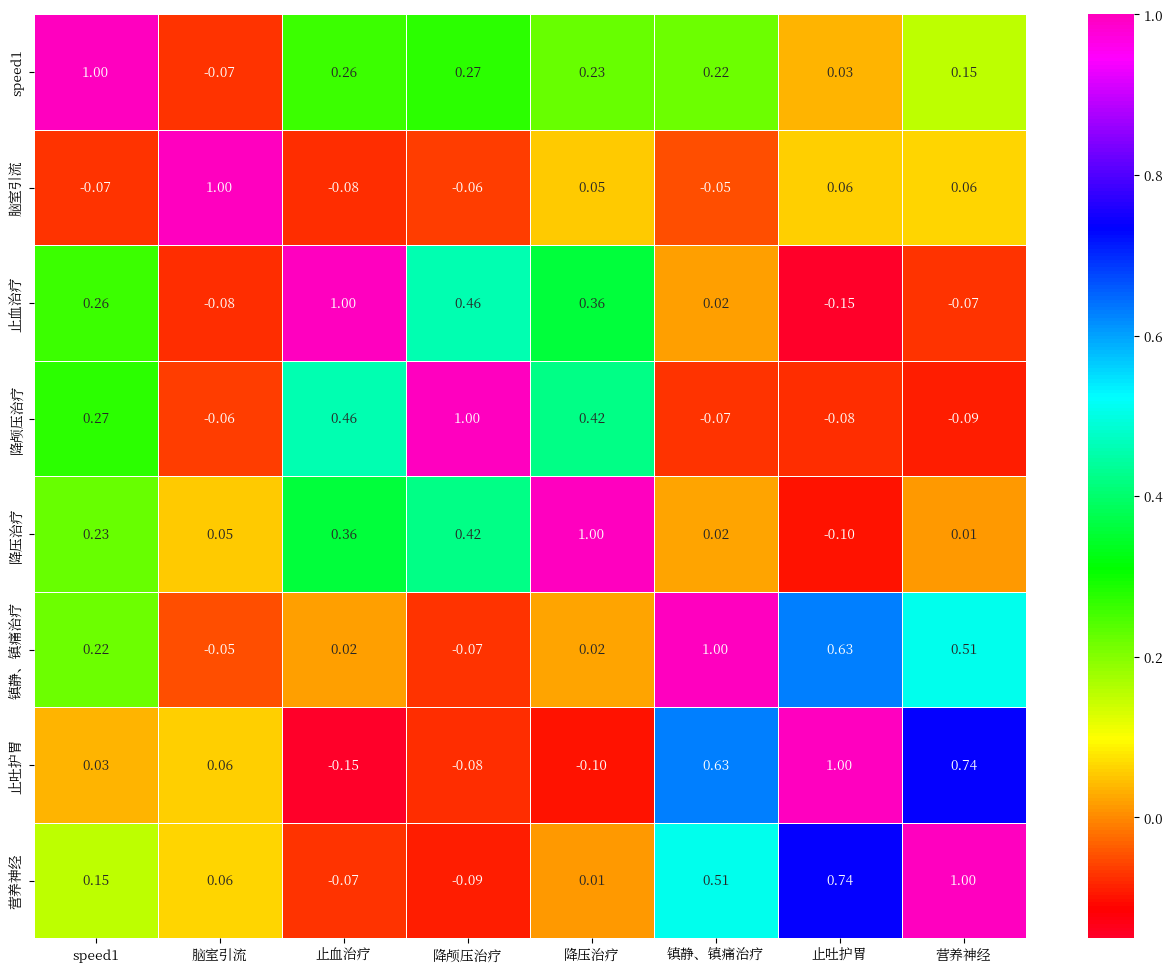

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 计算斯皮尔曼相关性系数矩阵
spearman_corr = filtered_data_corrected[['speed1',
                     '脑室引流','止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="gist_rainbow" ,annot=True, fmt=".2f", linewidths=0.5)

<Axes: >

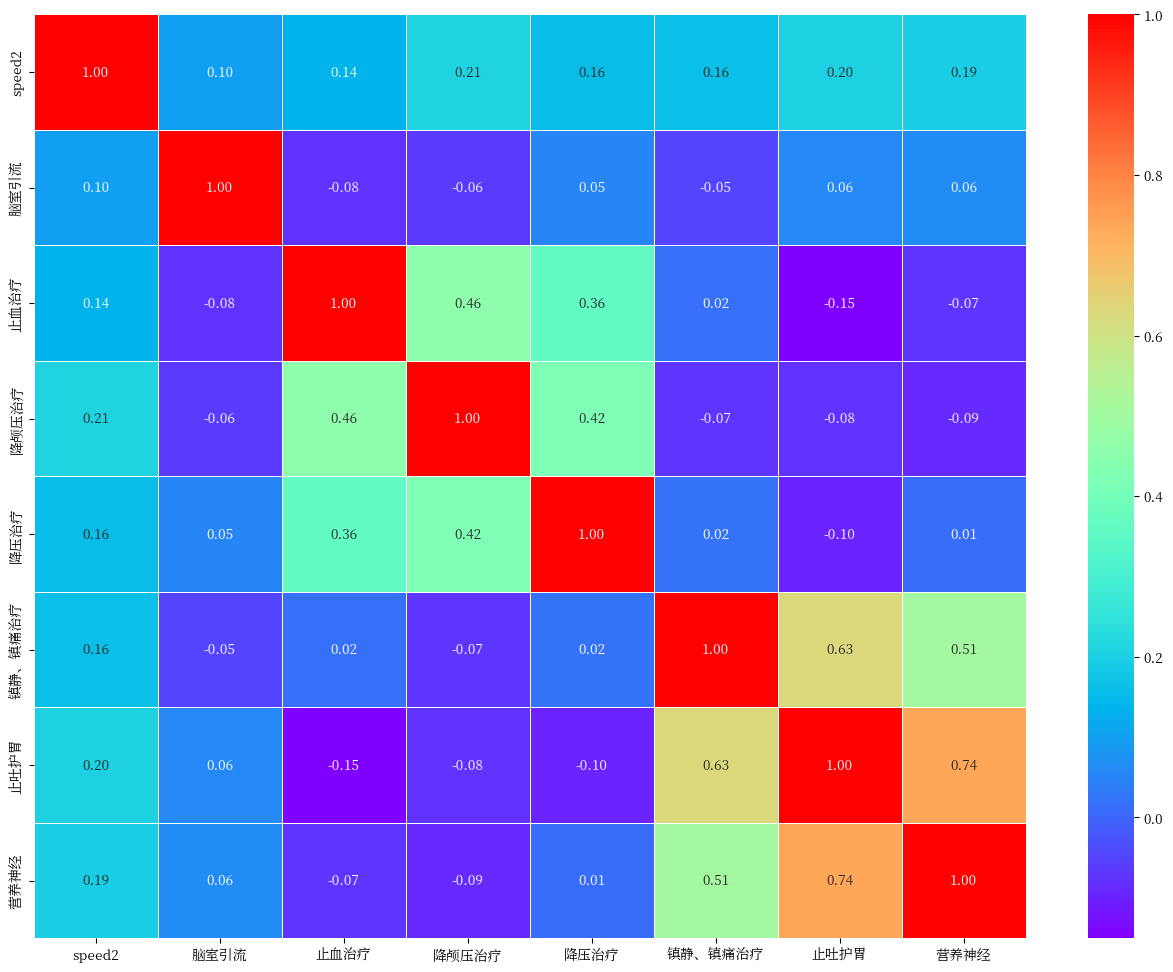

In [87]:
spearman_corr = filtered_data_corrected[['speed2',
                     '脑室引流','止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="rainbow" ,annot=True, fmt=".2f", linewidths=0.5)

<Axes: >

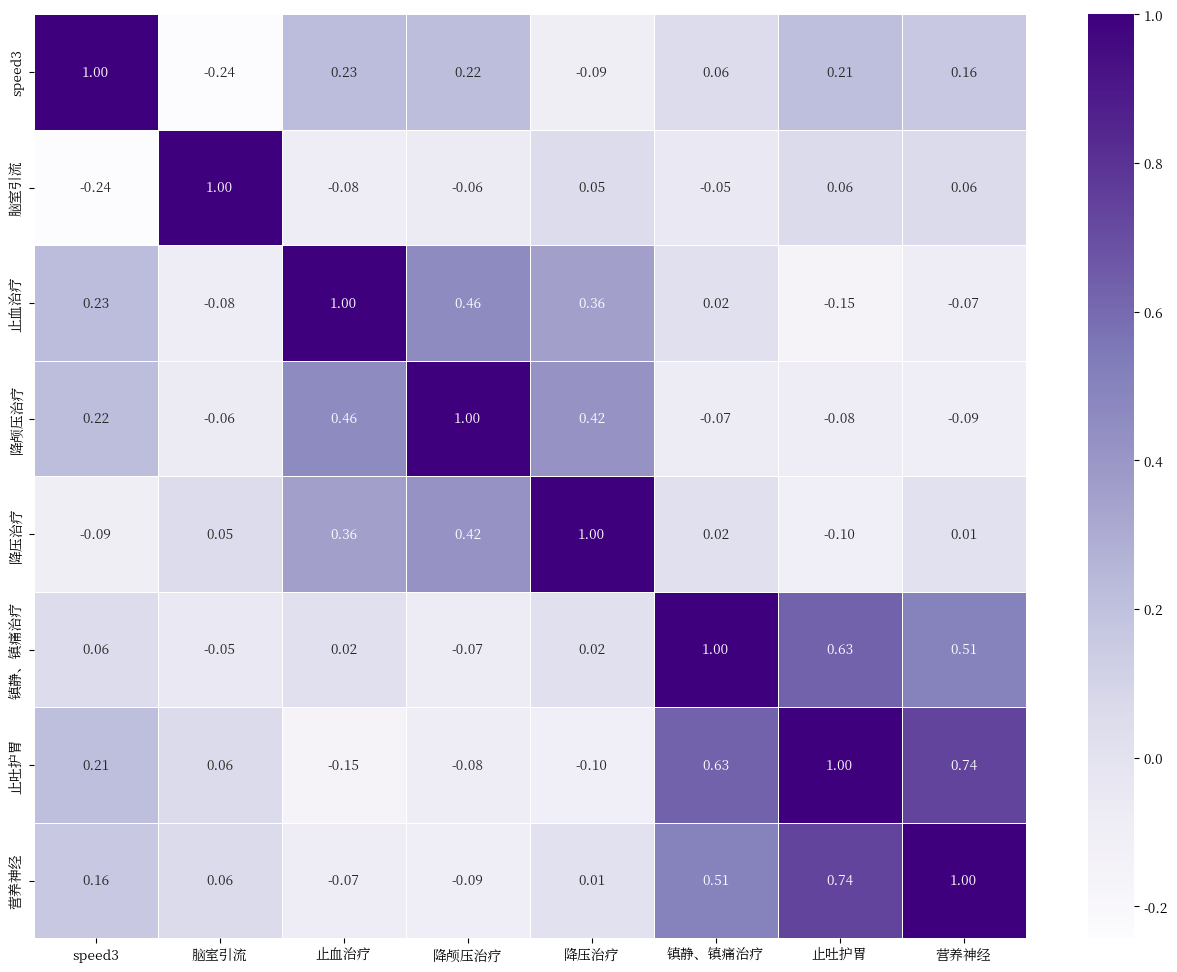

In [88]:
spearman_corr = filtered_data_corrected[['speed3',
                     '脑室引流','止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="Purples" ,annot=True, fmt=".2f", linewidths=0.5)



<Axes: >

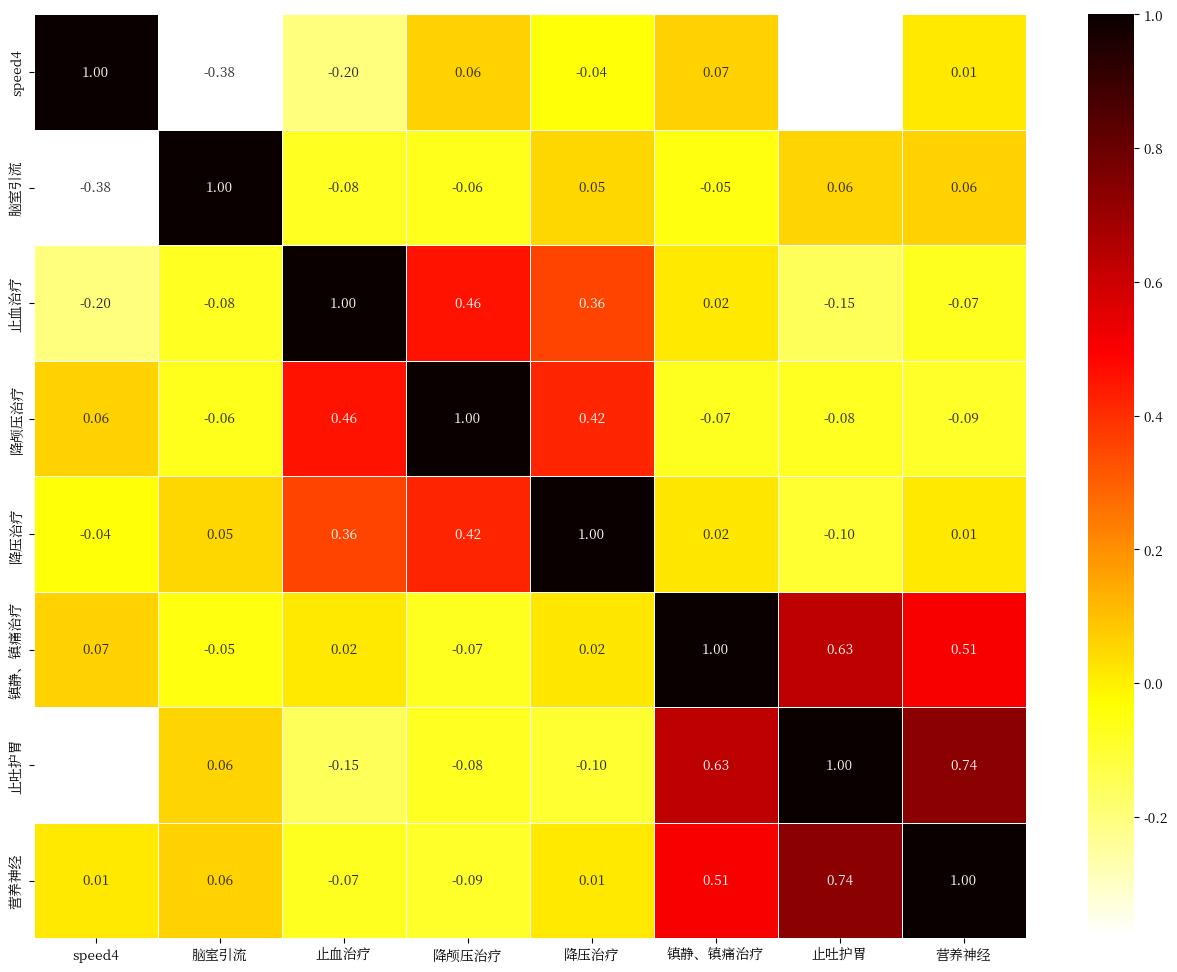

In [89]:
spearman_corr = filtered_data_corrected[['speed4',
                     '脑室引流','止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="hot_r" ,annot=True, fmt=".2f", linewidths=0.5)



<Axes: >

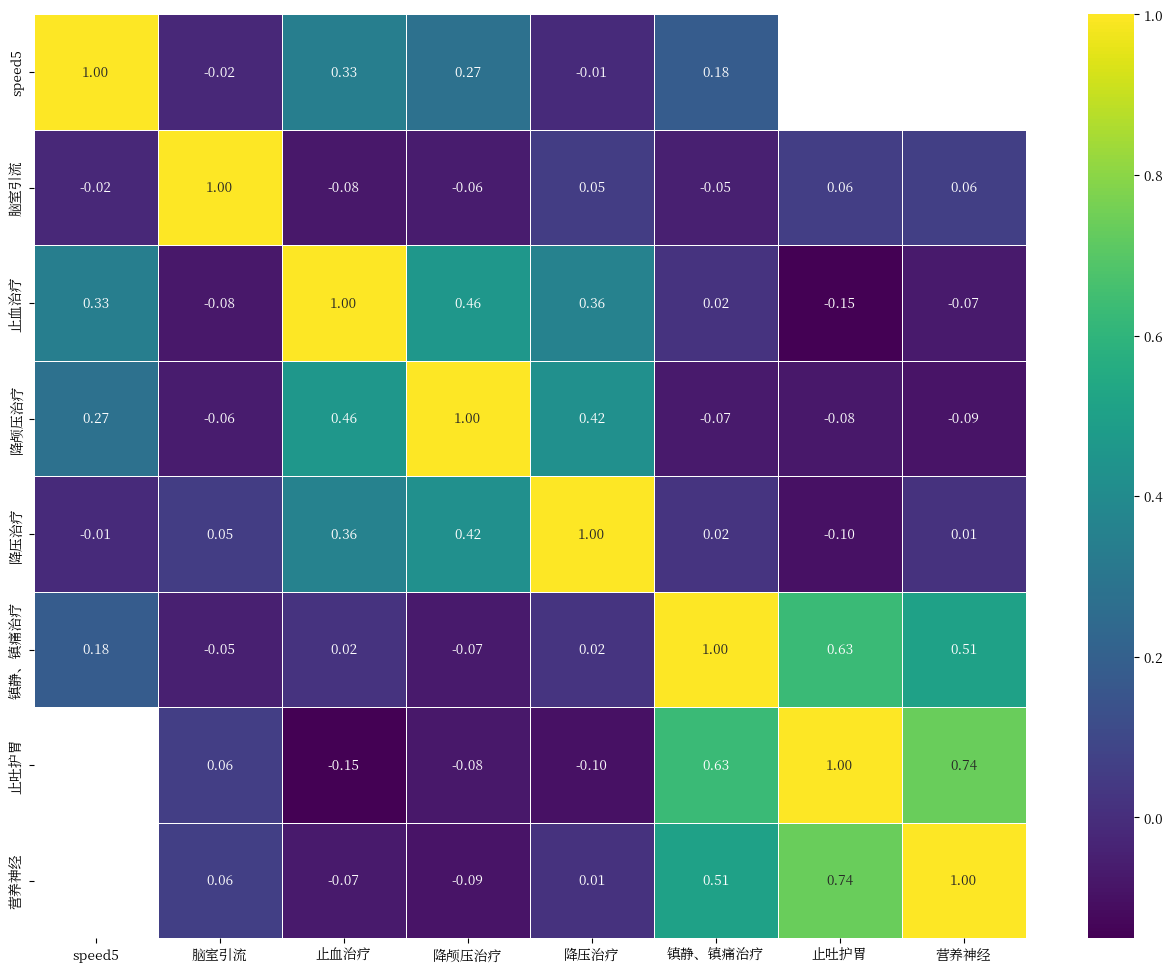

In [90]:
spearman_corr = filtered_data_corrected[['speed5',
                     '脑室引流','止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="viridis" ,annot=True, fmt=".2f", linewidths=0.5)

<Axes: >

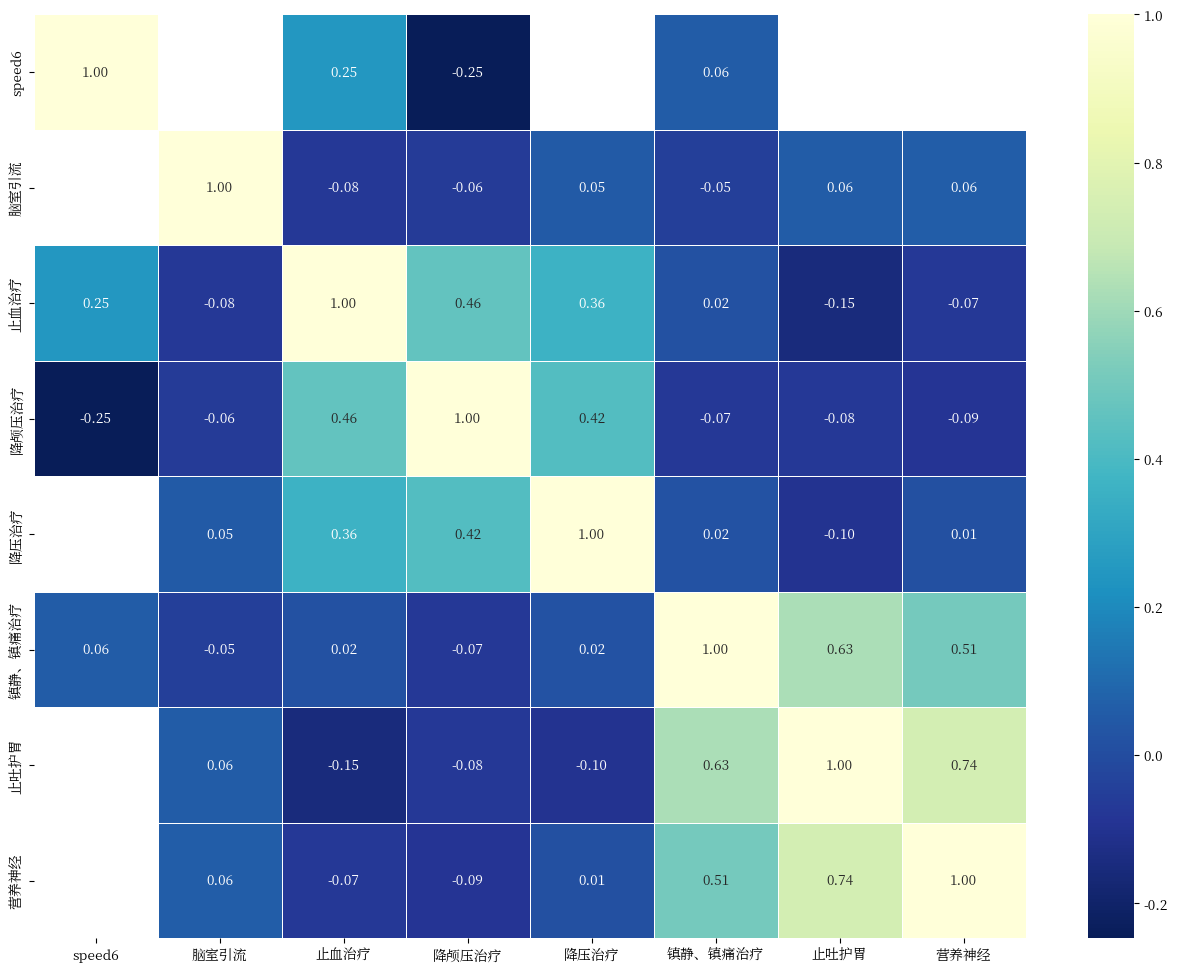

In [91]:
spearman_corr = filtered_data_corrected[['speed6',
                     '脑室引流','止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="YlGnBu_r" ,annot=True, fmt=".2f", linewidths=0.5)

<Axes: >

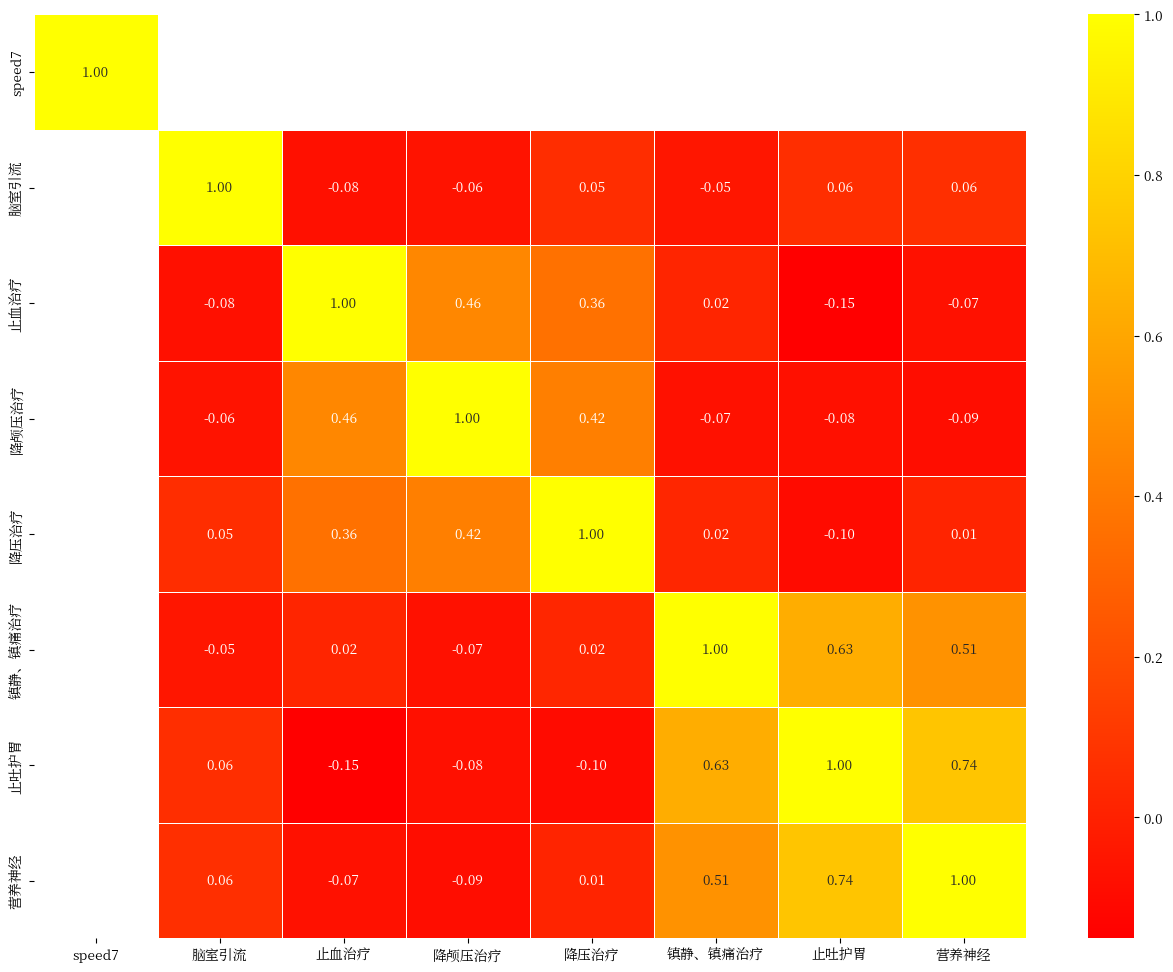

In [92]:
spearman_corr = filtered_data_corrected[['speed7',
                     '脑室引流','止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="autumn" ,annot=True, fmt=".2f", linewidths=0.5)



<Axes: >

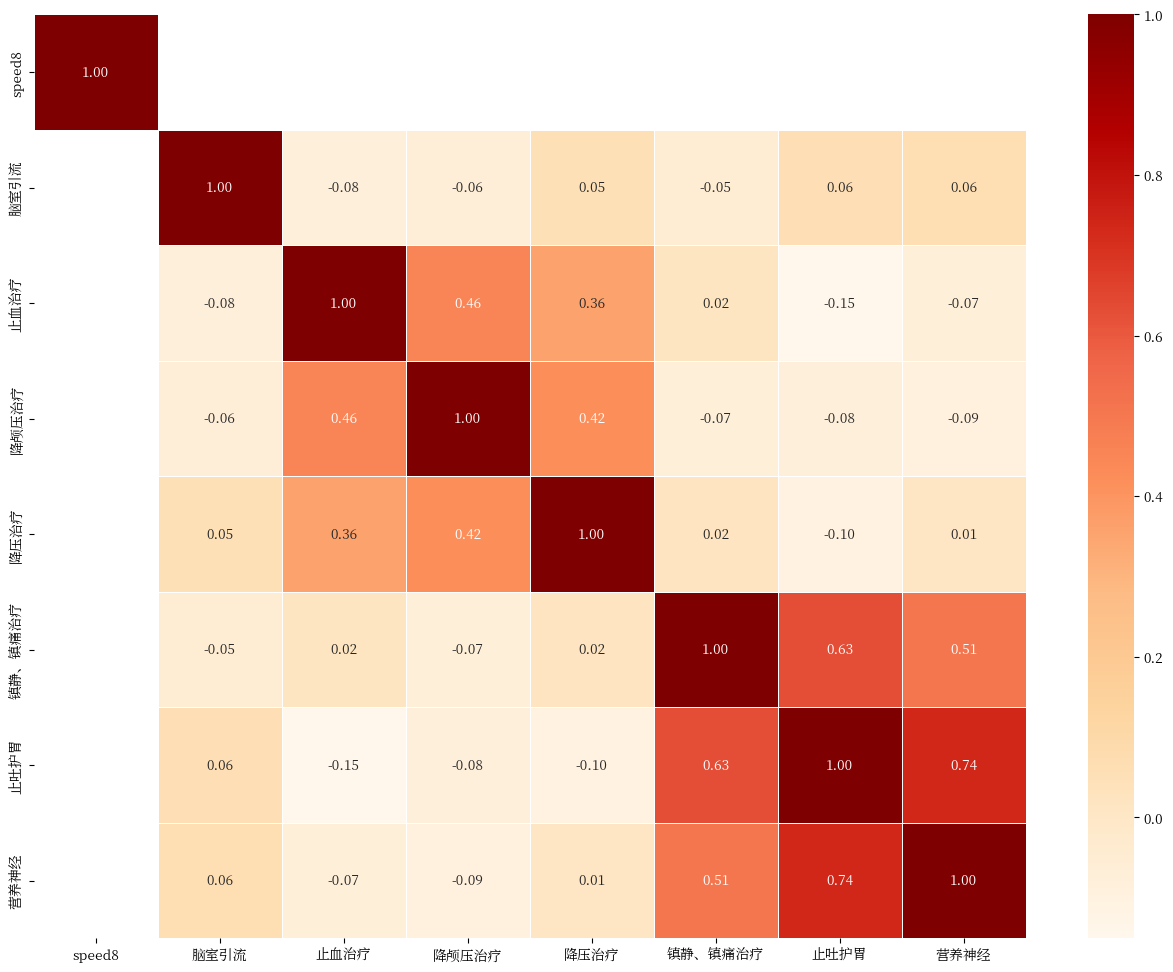

In [93]:
spearman_corr = filtered_data_corrected[['speed8',
                     '脑室引流','止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, cmap="OrRd" ,annot=True, fmt=".2f", linewidths=0.5)
# plt.savefig('./斯皮尔曼相关性矩阵热力图.jpg')

# DDDDDDDDDD

In [94]:
import pandas as pd
table1 = pd.read_excel("表1-患者列表及临床信息.xlsx")
table1.head()


,Unnamed: 0,90天mRS,数据集划分,入院首次检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,发病到首次影像检查时间间隔,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,0,0,0,0,2.5,180/90,0,1,1,1,1,1,1
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,0,0,0,0,3.0,199/120,0,1,1,1,0,1,1
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,0,0,0,0,2.0,199/120,0,1,1,1,1,1,1
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,0,0,0,0,1.0,186/99,0,1,1,1,0,0,0
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,0,0,0,0,5.0,135/92,0,1,1,0,0,1,1


In [95]:
table2 = pd.read_excel("表2-患者影像信息血肿及水肿的体积及位置.xlsx")
table2.head()

,ID,入院首次检查流水号,HM_volume0,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,HM_MCA_L_Ratio,HM_PCA_L_Ratio,HM_Pons_Medulla_L_Ratio,HM_Cerebellum_L_Ratio,ED_volume0,ED_ACA_R_Ratio,ED_MCA_R_Ratio,ED_PCA_R_Ratio,ED_Pons_Medulla_R_Ratio,ED_Cerebellum_R_Ratio,ED_ACA_L_Ratio,ED_MCA_L_Ratio,ED_PCA_L_Ratio,ED_Pons_Medulla_L_Ratio,ED_Cerebellum_L_Ratio,随访1流水号,HM_volume1,HM_ACA_R_Ratio.1,HM_MCA_R_Ratio.1,HM_PCA_R_Ratio.1,HM_Pons_Medulla_R_Ratio.1,HM_Cerebellum_R_Ratio.1,HM_ACA_L_Ratio.1,HM_MCA_L_Ratio.1,HM_PCA_L_Ratio.1,HM_Pons_Medulla_L_Ratio.1,HM_Cerebellum_L_Ratio.1,ED_volume1,ED_ACA_R_Ratio.1,ED_MCA_R_Ratio.1,ED_PCA_R_Ratio.1,ED_Pons_Medulla_R_Ratio.1,ED_Cerebellum_R_Ratio.1,ED_ACA_L_Ratio.1,ED_MCA_L_Ratio.1,ED_PCA_L_Ratio.1,ED_Pons_Medulla_L_Ratio.1,ED_Cerebellum_L_Ratio.1,随访2流水号,HM_volume2,HM_ACA_R_Ratio.2,HM_MCA_R_Ratio.2,HM_PCA_R_Ratio.2,HM_Pons_Medulla_R_Ratio.2,HM_Cerebellum_R_Ratio.2,HM_ACA_L_Ratio.2,HM_MCA_L_Ratio.2,HM_PCA_L_Ratio.2,HM_Pons_Medulla_L_Ratio.2,HM_Cerebellum_L_Ratio.2,ED_volume2,ED_ACA_R_Ratio.2,ED_MCA_R_Ratio.2,ED_PCA_R_Ratio.2,ED_Pons_Medulla_R_Ratio.2,ED_Cerebellum_R_Ratio.2,ED_ACA_L_Ratio.2,ED_MCA_L_Ratio.2,ED_PCA_L_Ratio.2,ED_Pons_Medulla_L_Ratio.2,ED_Cerebellum_L_Ratio.2,随访3流水号,HM_volume3,HM_ACA_R_Ratio.3,HM_MCA_R_Ratio.3,HM_PCA_R_Ratio.3,HM_Pons_Medulla_R_Ratio.3,HM_Cerebellum_R_Ratio.3,HM_ACA_L_Ratio.3,HM_MCA_L_Ratio.3,HM_PCA_L_Ratio.3,HM_Pons_Medulla_L_Ratio.3,HM_Cerebellum_L_Ratio.3,ED_volume3,ED_ACA_R_Ratio.3,ED_MCA_R_Ratio.3,ED_PCA_R_Ratio.3,ED_Pons_Medulla_R_Ratio.3,ED_Cerebellum_R_Ratio.3,ED_ACA_L_Ratio.3,ED_MCA_L_Ratio.3,ED_PCA_L_Ratio.3,ED_Pons_Medulla_L_Ratio.3,ED_Cerebellum_L_Ratio.3,随访4流水号,HM_volume4,HM_ACA_R_Ratio.4,HM_MCA_R_Ratio.4,HM_PCA_R_Ratio.4,HM_Pons_Medulla_R_Ratio.4,HM_Cerebellum_R_Ratio.4,HM_ACA_L_Ratio.4,HM_MCA_L_Ratio.4,HM_PCA_L_Ratio.4,HM_Pons_Medulla_L_Ratio.4,HM_Cerebellum_L_Ratio.4,ED_volume4,ED_ACA_R_Ratio.4,ED_MCA_R_Ratio.4,ED_PCA_R_Ratio.4,ED_Pons_Medulla_R_Ratio.4,ED_Cerebellum_R_Ratio.4,ED_ACA_L_Ratio.4,ED_MCA_L_Ratio.4,ED_PCA_L_Ratio.4,ED_Pons_Medulla_L_Ratio.4,ED_Cerebellum_L_Ratio.4,随访5流水号,HM_volume5,HM_ACA_R_Ratio.5,HM_MCA_R_Ratio.5,HM_PCA_R_Ratio.5,HM_Pons_Medulla_R_Ratio.5,HM_Cerebellum_R_Ratio.5,HM_ACA_L_Ratio.5,HM_MCA_L_Ratio.5,HM_PCA_L_Ratio.5,HM_Pons_Medulla_L_Ratio.5,HM_Cerebellum_L_Ratio.5,ED_volume5,ED_ACA_R_Ratio.5,ED_MCA_R_Ratio.5,ED_PCA_R_Ratio.5,ED_Pons_Medulla_R_Ratio.5,ED_Cerebellum_R_Ratio.5,ED_ACA_L_Ratio.5,ED_MCA_L_Ratio.5,ED_PCA_L_Ratio.5,ED_Pons_Medulla_L_Ratio.5,ED_Cerebellum_L_Ratio.5,随访6流水号,HM_volume6,HM_ACA_R_Ratio.6,HM_MCA_R_Ratio.6,HM_PCA_R_Ratio.6,HM_Pons_Medulla_R_Ratio.6,HM_Cerebellum_R_Ratio.6,HM_ACA_L_Ratio.6,HM_MCA_L_Ratio.6,HM_PCA_L_Ratio.6,HM_Pons_Medulla_L_Ratio.6,HM_Cerebellum_L_Ratio.6,ED_volume6,ED_ACA_R_Ratio.6,ED_MCA_R_Ratio.6,ED_PCA_R_Ratio.6,ED_Pons_Medulla_R_Ratio.6,ED_Cerebellum_R_Ratio.6,ED_ACA_L_Ratio.6,ED_MCA_L_Ratio.6,ED_PCA_L_Ratio.6,ED_Pons_Medulla_L_Ratio.6,ED_Cerebellum_L_Ratio.6,随访7流水号,HM_volume7,HM_ACA_R_Ratio.7,HM_MCA_R_Ratio.7,HM_PCA_R_Ratio.7,HM_Pons_Medulla_R_Ratio.7,HM_Cerebellum_R_Ratio.7,HM_ACA_L_Ratio.7,HM_MCA_L_Ratio.7,HM_PCA_L_Ratio.7,HM_Pons_Medulla_L_Ratio.7,HM_Cerebellum_L_Ratio.7,ED_volume7,ED_ACA_R_Ratio.7,ED_MCA_R_Ratio.7,ED_PCA_R_Ratio.7,ED_Pons_Medulla_R_Ratio.7,ED_Cerebellum_R_Ratio.7,ED_ACA_L_Ratio.7,ED_MCA_L_Ratio.7,ED_PCA_L_Ratio.7,ED_Pons_Medulla_L_Ratio.7,ED_Cerebellum_L_Ratio.7,随访8流水号,HM_volume8,HM_ACA_R_Ratio.8,HM_MCA_R_Ratio.8,HM_PCA_R_Ratio.8,HM_Pons_Medulla_R_Ratio.8,HM_Cerebellum_R_Ratio.8,HM_ACA_L_Ratio.8,HM_MCA_L_Ratio.8,HM_PCA_L_Ratio.8,HM_Pons_Medulla_L_Ratio.8,HM_Cerebellum_L_Ratio.8,ED_volume8,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,20161212002136,69714,0.000258,0.877112,0.120148,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,48919,0.108833,0.726241,0.

In [96]:
# 获取治疗相关的列
treatment_columns = table1.columns[16:23].tolist()  # 获取从Q列到W列的列名列表

# 再次合并数据和table1，以确保我们有必要的列
# 选择data数据框的 'ID'、'首次检查流水号' 和 'ED_volume' 列，以及table1数据框的 '入院首次影像检查流水号'、'发病到首次影像检查时间间隔' 列和治疗相关的列
merged_data_corrected = pd.merge(table2[['ID', '入院首次检查流水号','HM_volume1','HM_volume2','HM_volume3','HM_volume4','HM_volume5','HM_volume6','HM_volume7','HM_volume8',
                      'ED_volume1','ED_volume2','ED_volume3','ED_volume4','ED_volume5','ED_volume6','ED_volume7','ED_volume8']],
                  table1[['入院首次检查流水号'] + treatment_columns],
                  left_on='入院首次检查流水号', right_on='入院首次检查流水号', how='left')

# 再次筛选出前100名患者
filtered_data_corrected = merged_data_corrected.loc[merged_data_corrected['ID'].str[-3:].astype(int) < 100]

# 显示前几行以确保合并成功
filtered_data_corrected.head()

,ID,入院首次检查流水号,HM_volume1,HM_volume2,HM_volume3,HM_volume4,HM_volume5,HM_volume6,HM_volume7,HM_volume8,ED_volume1,ED_volume2,ED_volume3,ED_volume4,ED_volume5,ED_volume6,ED_volume7,ED_volume8,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,sub001,20161212002136,74902.0,70952.0,62831.0,44029.0,NaN,NaN,NaN,NaN,57898.0,81747.0,107793.0,126558.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,sub002,20160406002131,52271.0,47748.0,13055.0,20.0,NaN,NaN,NaN,NaN,23390.0,28415.0,34868.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2,sub003,20160413000006,106042.0,103263.0,NaN,NaN,NaN,NaN,NaN,NaN,41292.0,49767.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,sub003,20160413000006,106042.0,103263.0,NaN,NaN,NaN,NaN,NaN,NaN,41292.0,49767.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,sub004,20161215001667,39877.0,16622.0,8441.0,NaN,NaN,NaN,NaN,NaN,18956.0,9540.0,5204.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0


<Axes: >

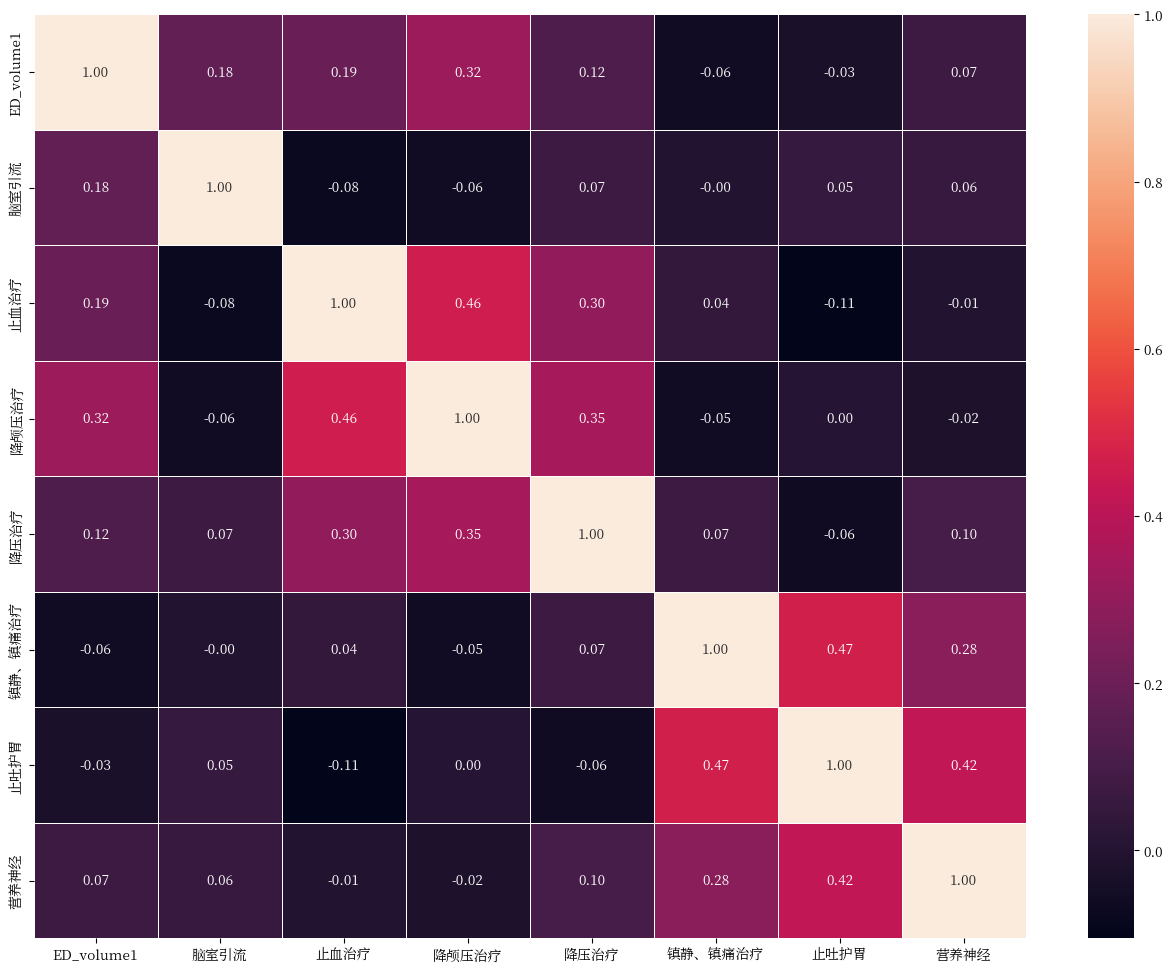

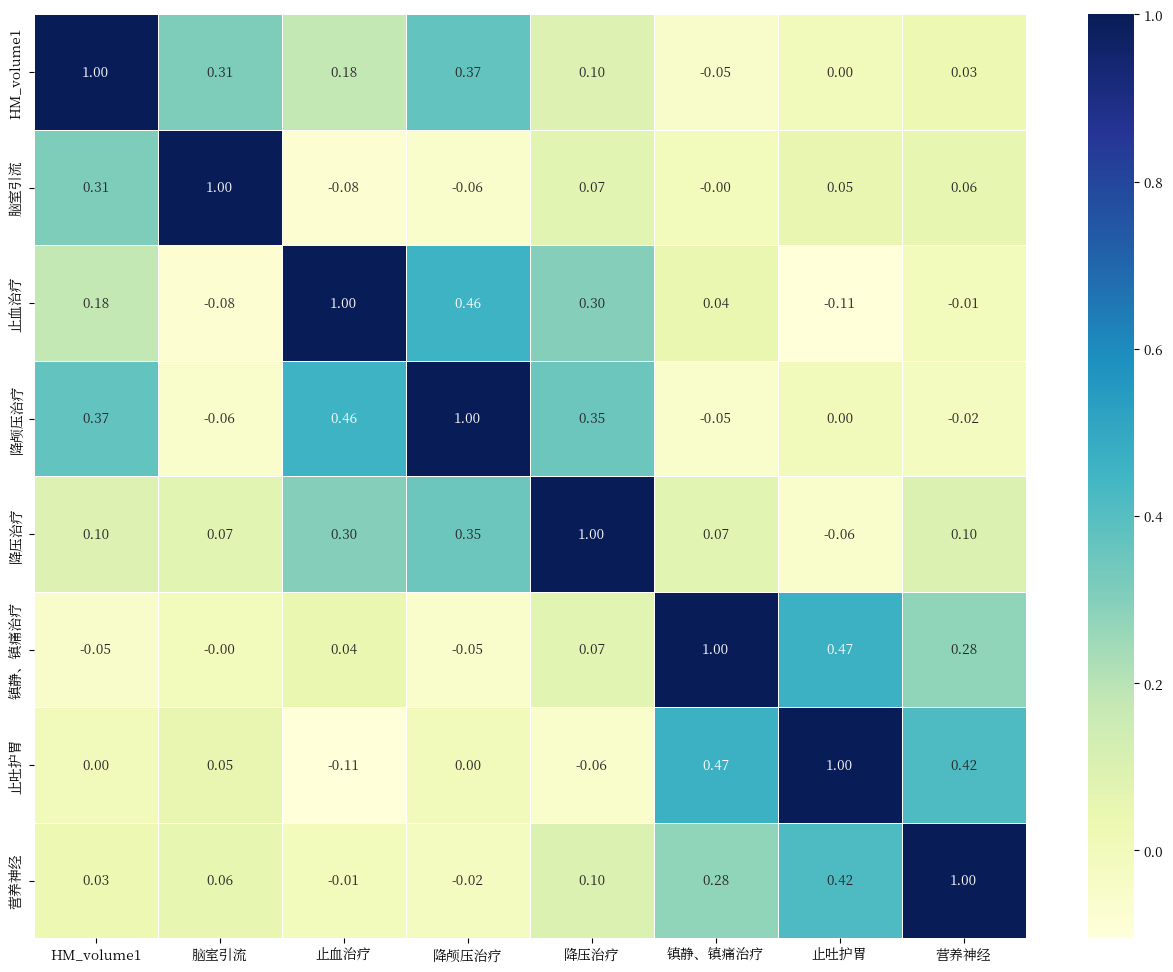

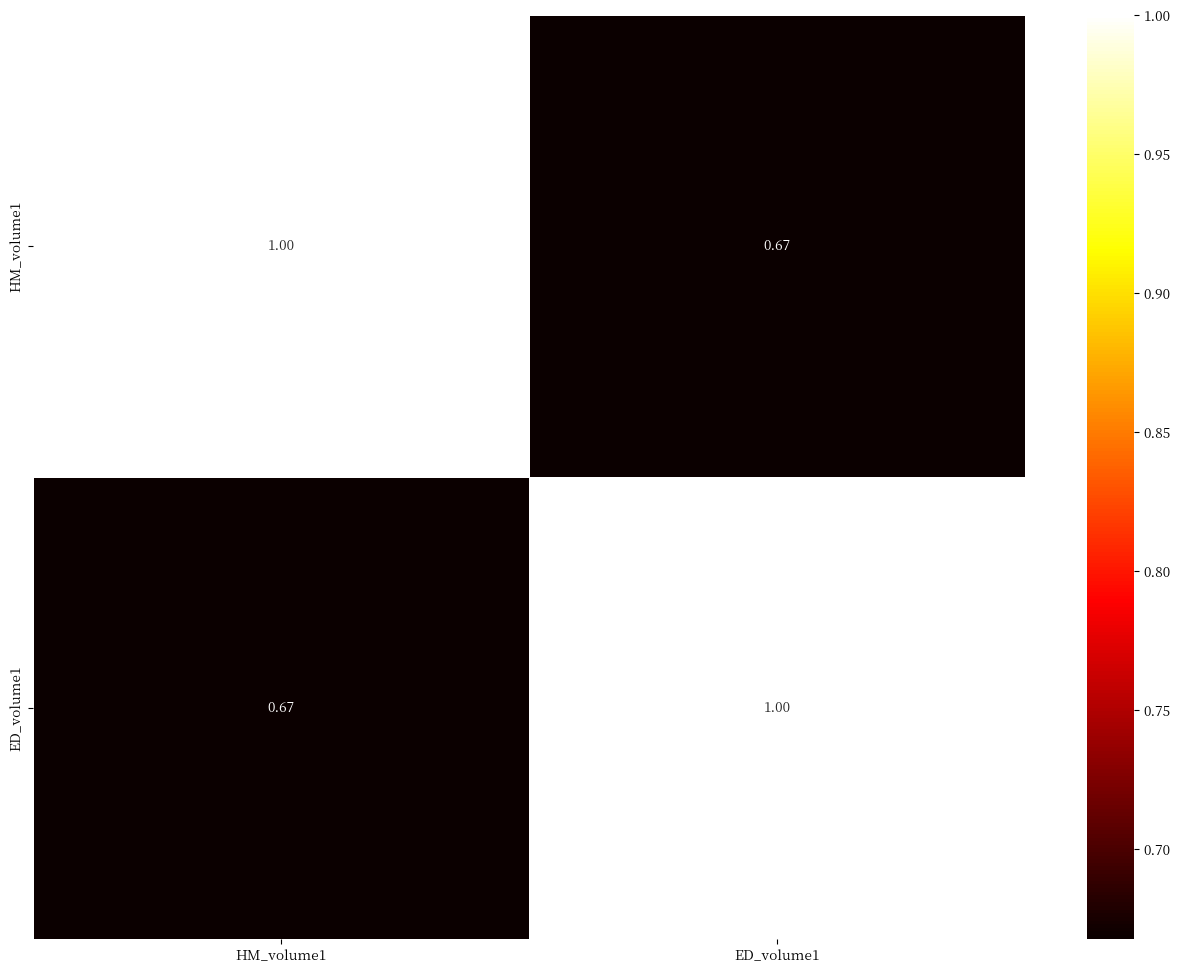

In [97]:
# 治疗方式与ED_volume相关性
# 计算斯皮尔曼相关性系数矩阵
spearman_corr = filtered_data_corrected[['ED_volume1', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", linewidths=0.5)

# 治疗方式与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume1', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# ED_volume与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume1', 'ED_volume1']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, cmap="hot", annot=True, fmt=".2f", linewidths=0.5)

<Axes: >

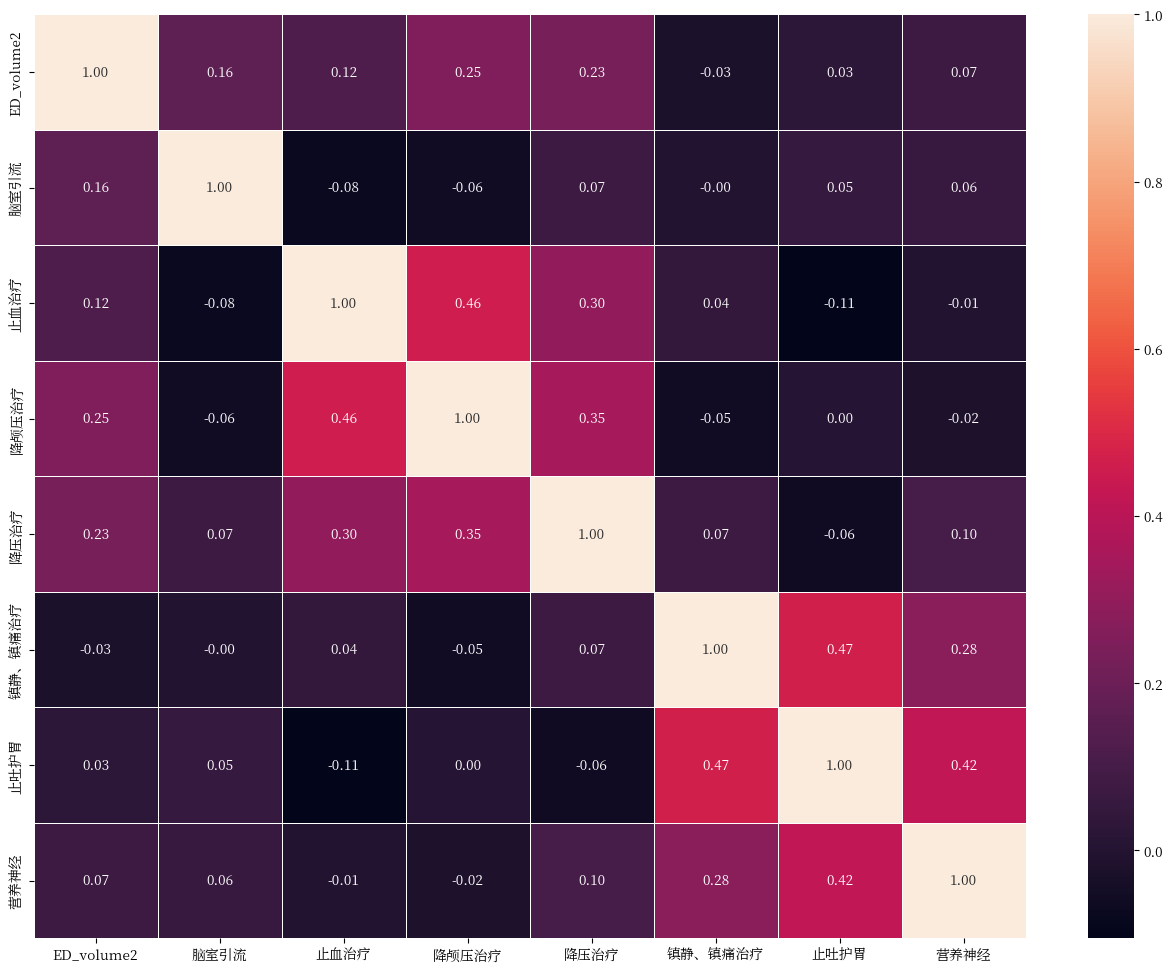

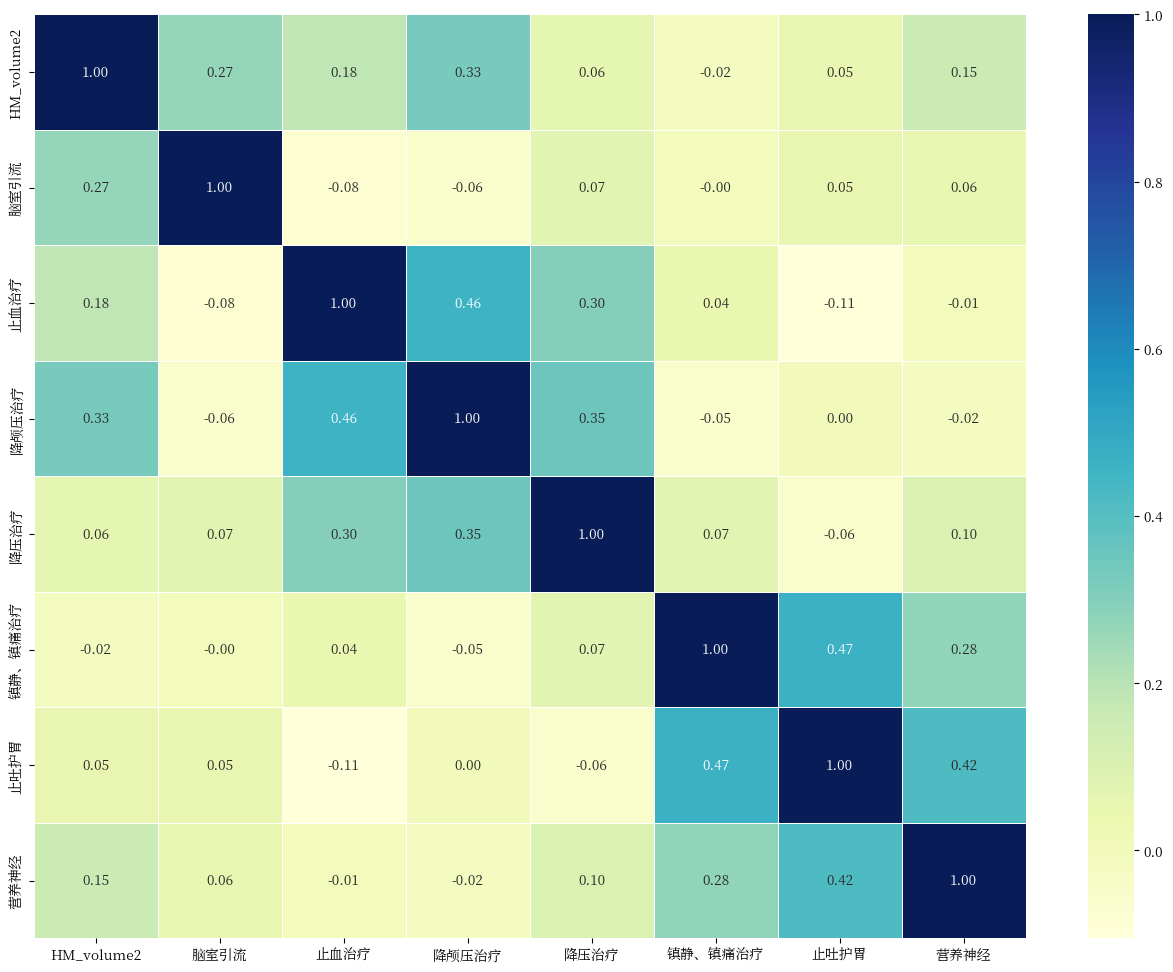

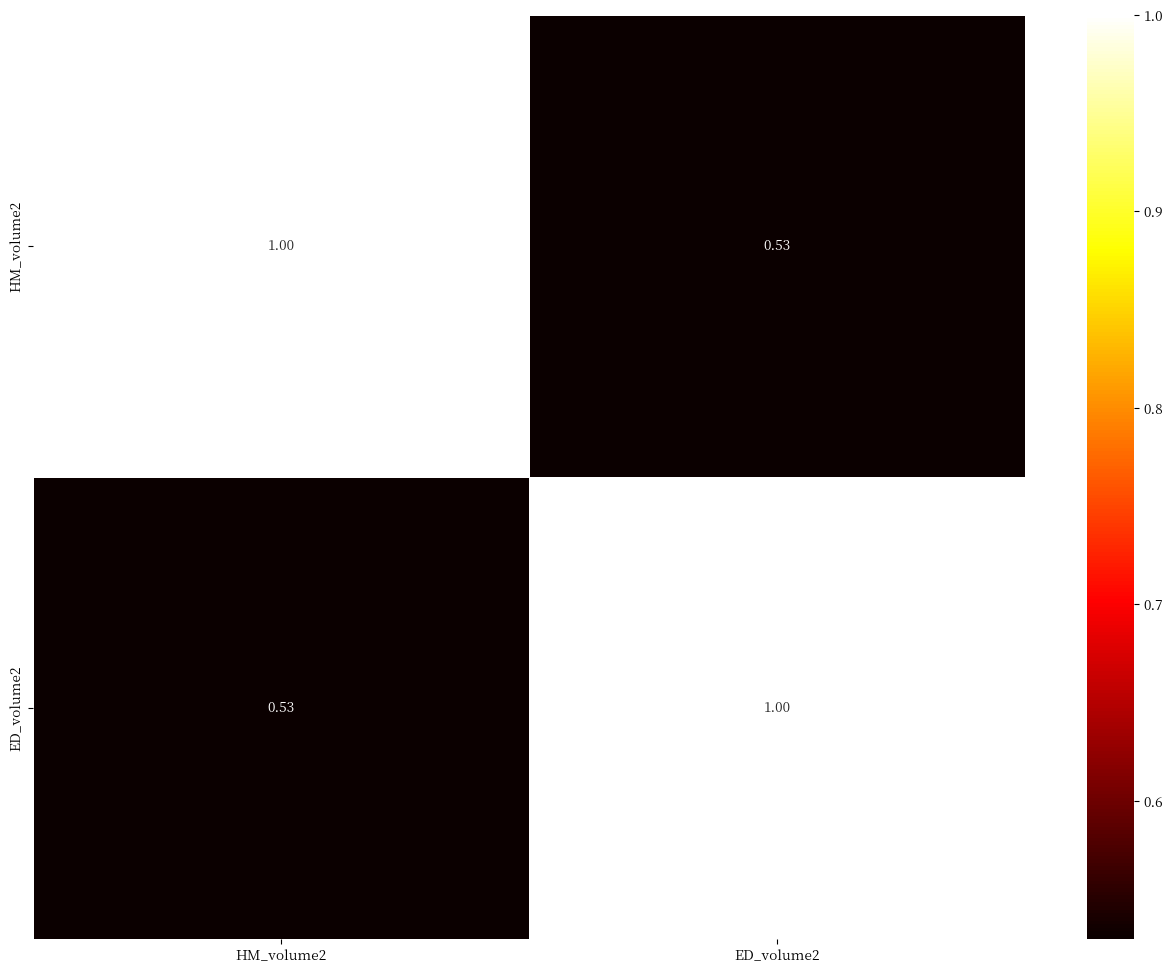

In [98]:
spearman_corr = filtered_data_corrected[['ED_volume2', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", linewidths=0.5)

# 治疗方式与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume2', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# ED_volume与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume2', 'ED_volume2']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, cmap="hot", annot=True, fmt=".2f", linewidths=0.5)

<Axes: >

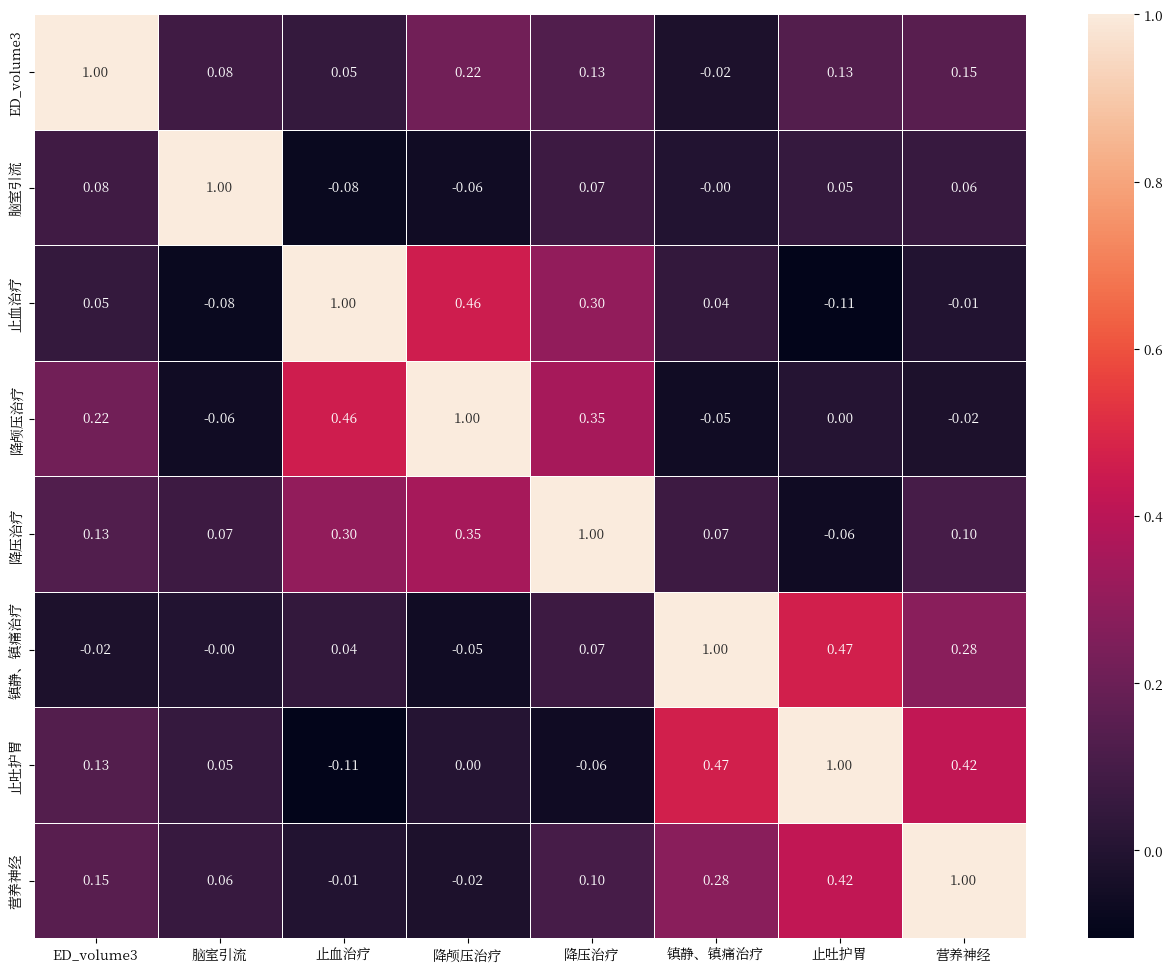

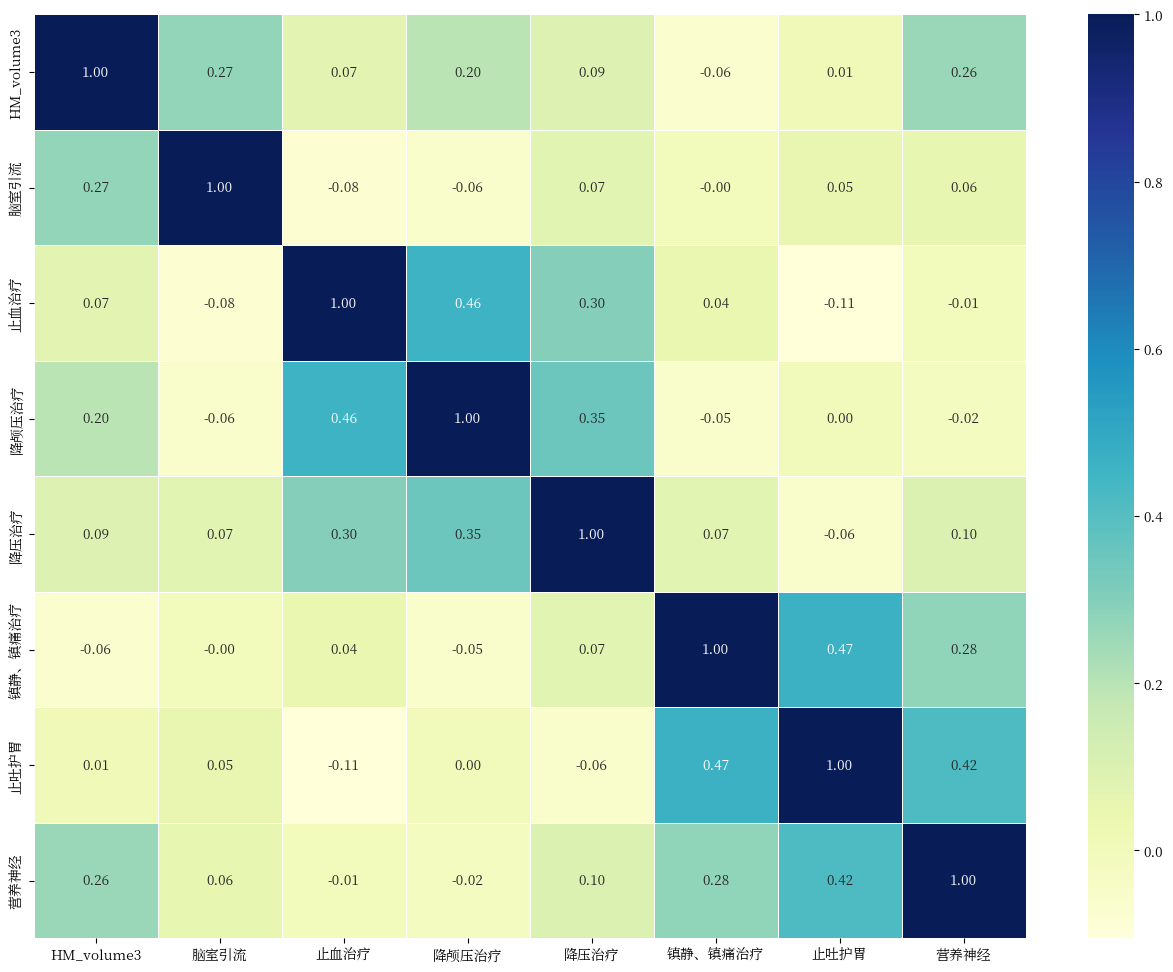

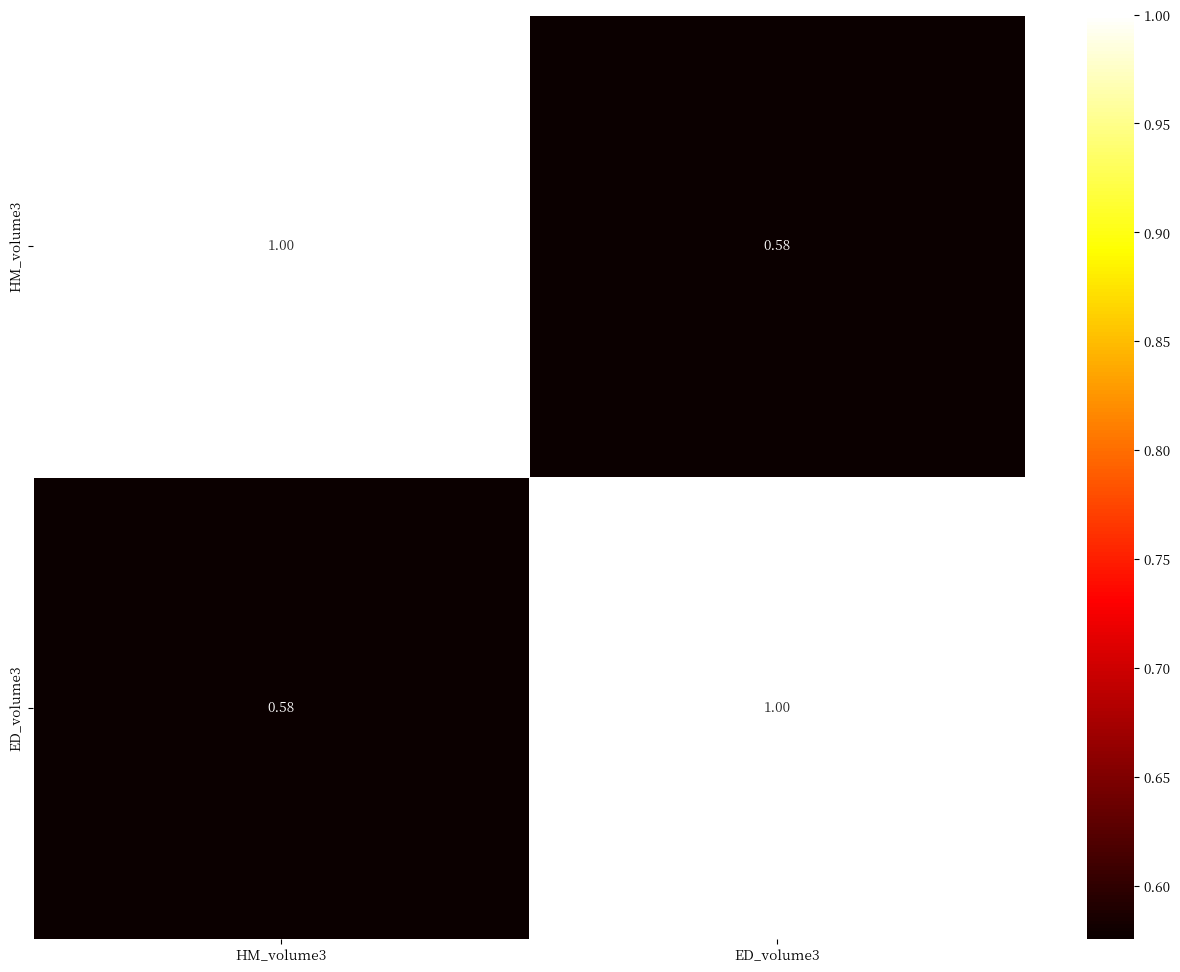

In [99]:
spearman_corr = filtered_data_corrected[['ED_volume3', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", linewidths=0.5)

# 治疗方式与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume3', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# ED_volume与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume3', 'ED_volume3']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, cmap="hot", annot=True, fmt=".2f", linewidths=0.5)

<Axes: >

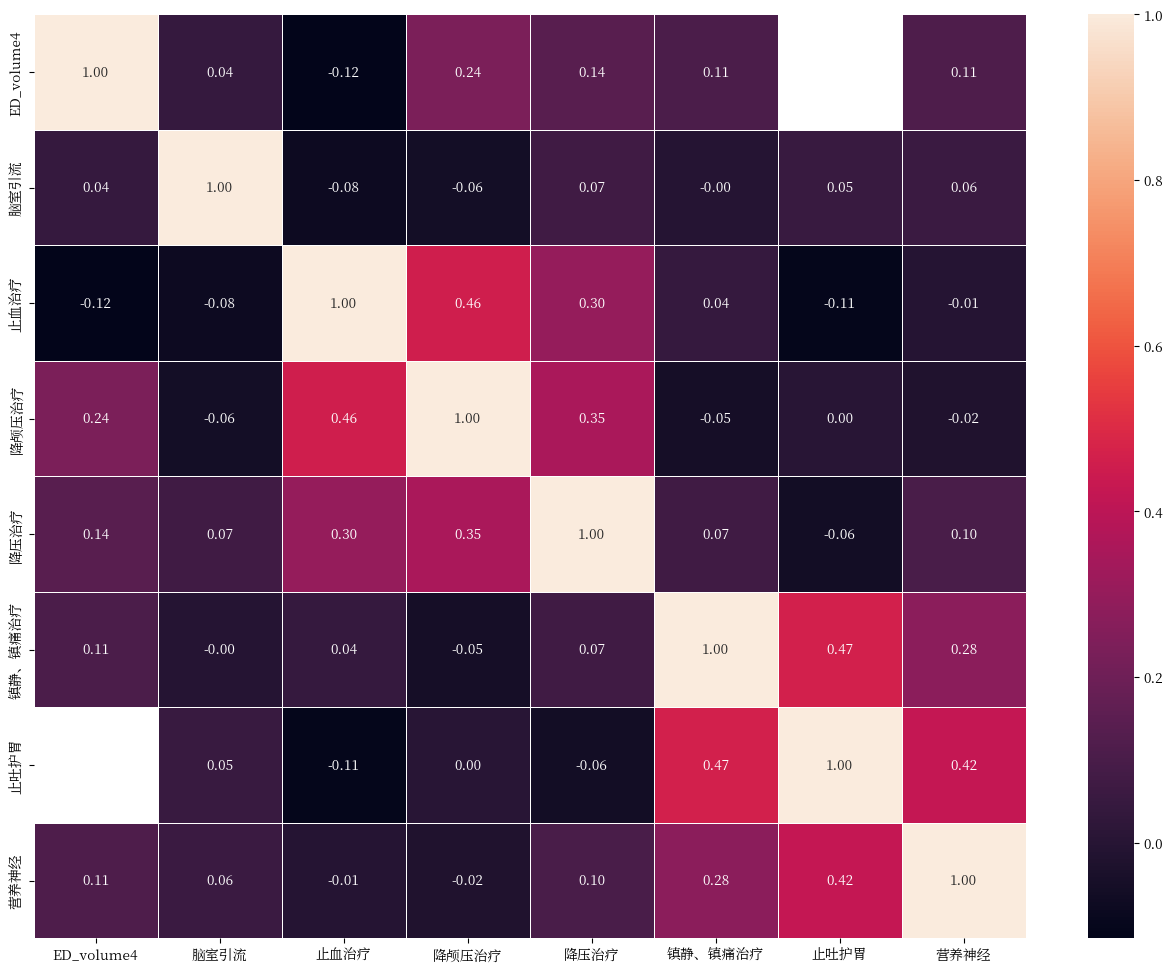

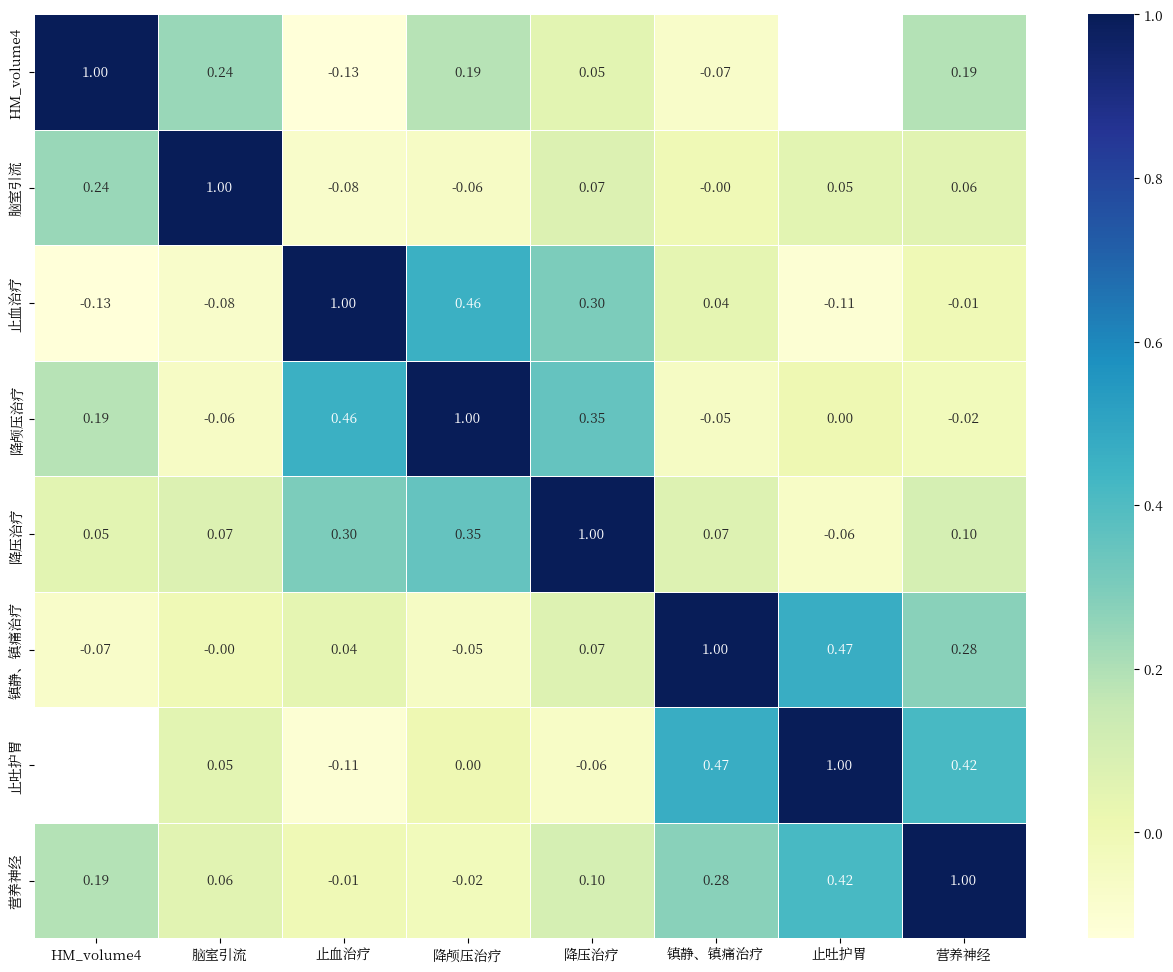

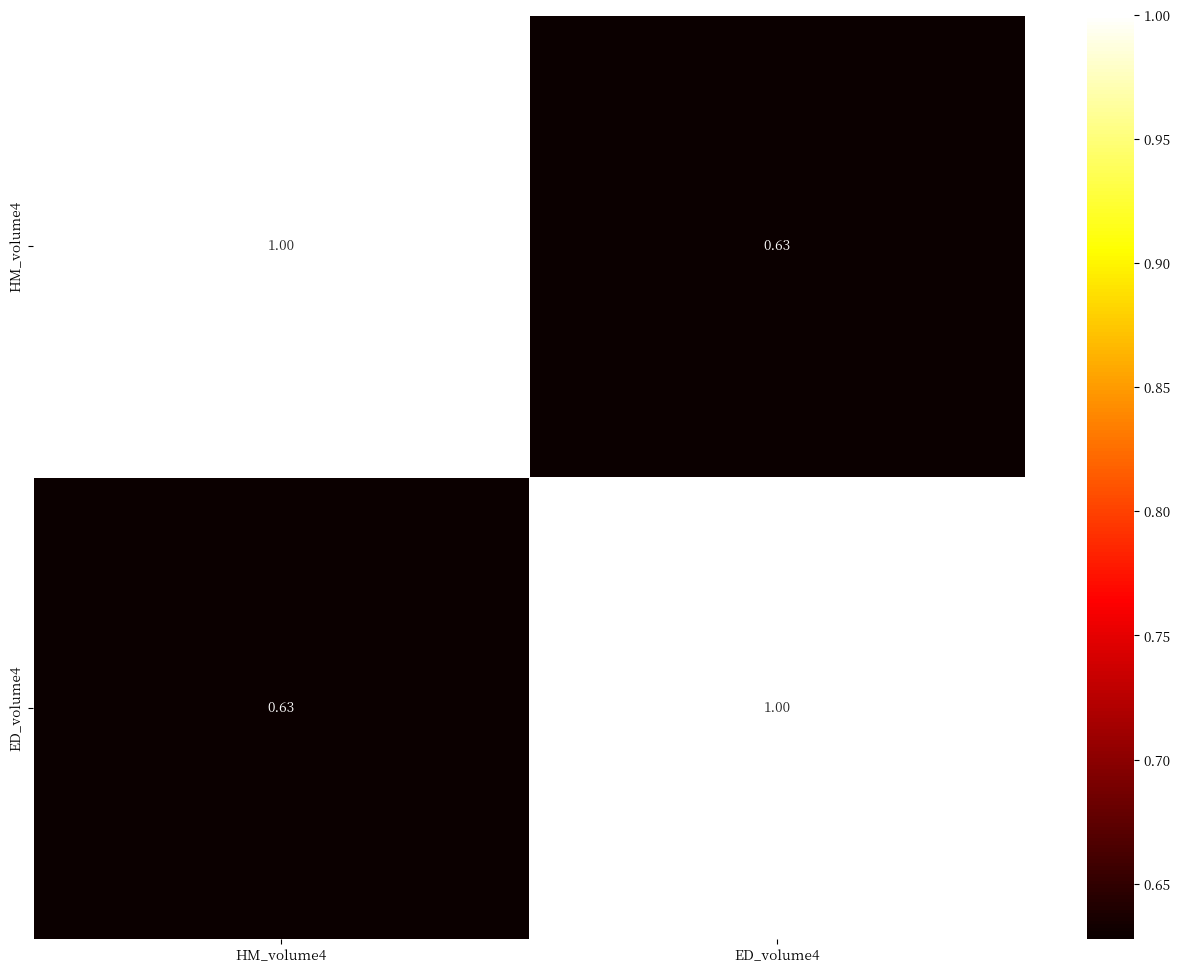

In [100]:
spearman_corr = filtered_data_corrected[['ED_volume4', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", linewidths=0.5)

# 治疗方式与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume4', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# ED_volume与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume4', 'ED_volume4']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, cmap="hot", annot=True, fmt=".2f", linewidths=0.5)

<Axes: >

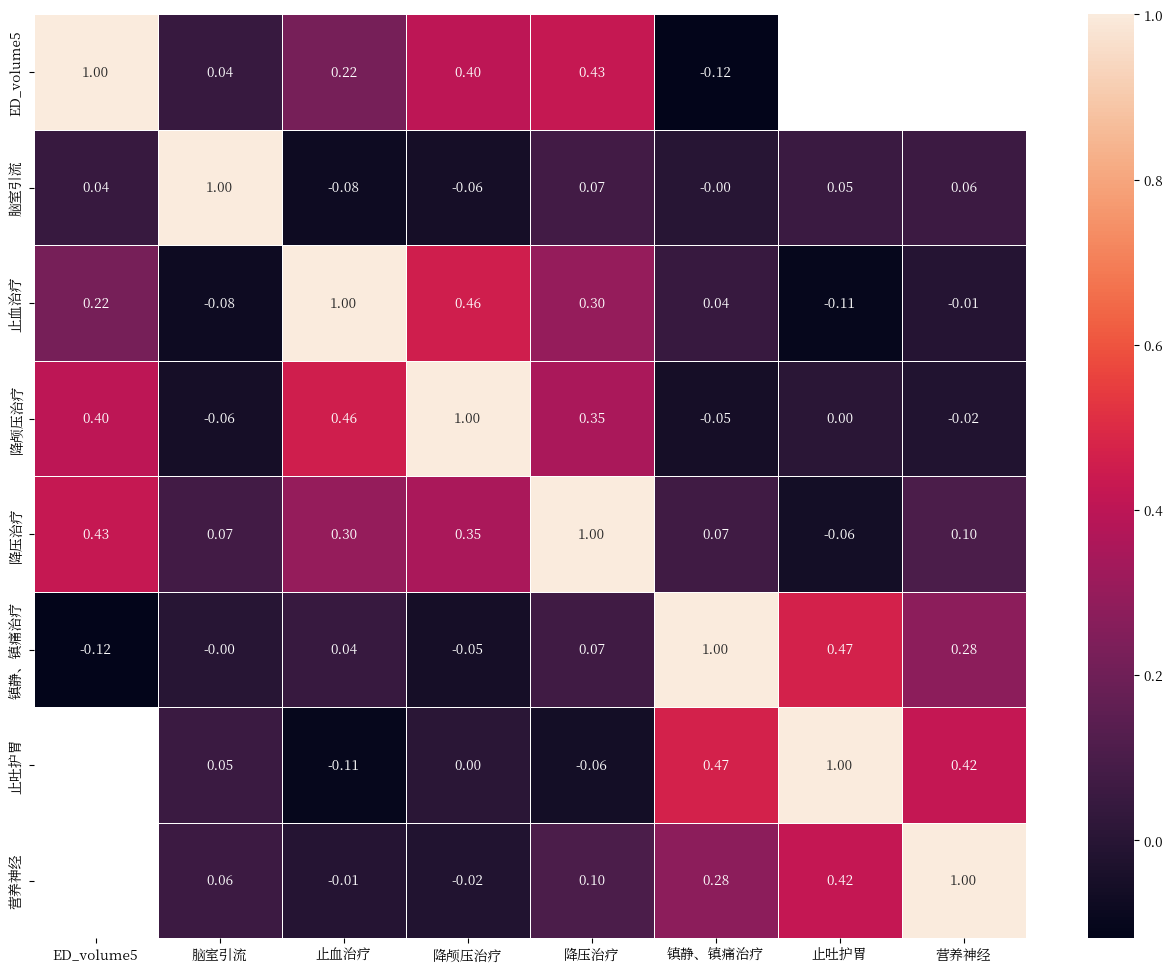

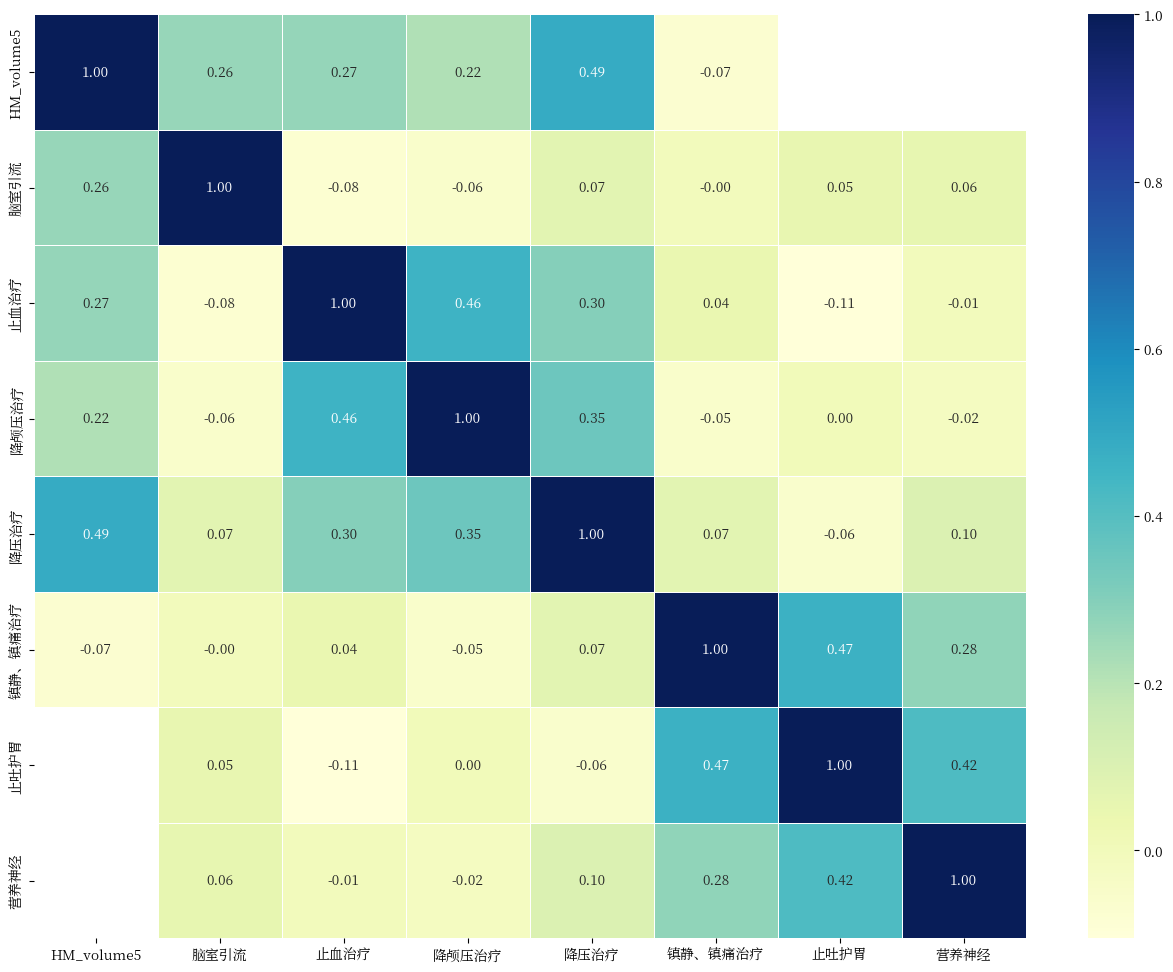

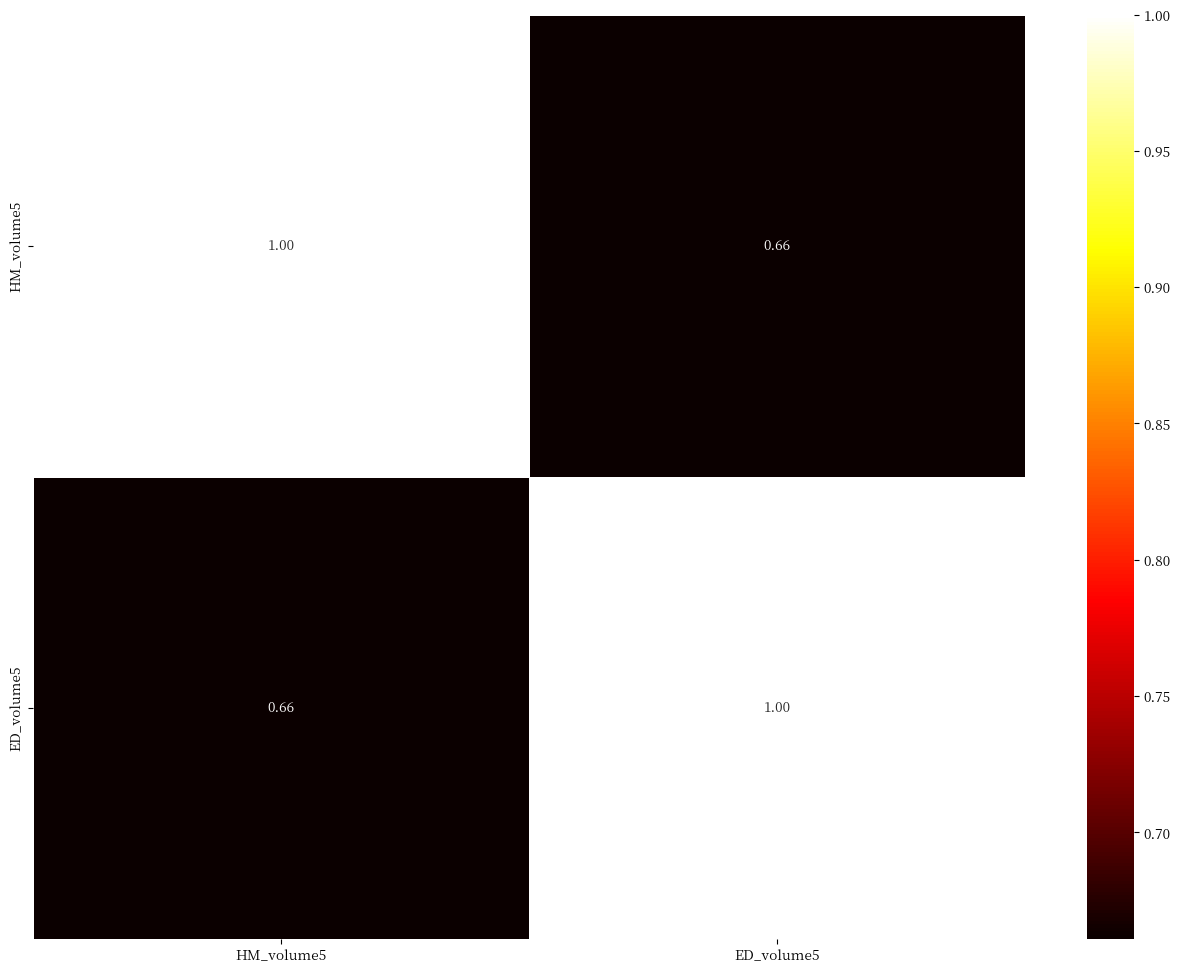

In [101]:
spearman_corr = filtered_data_corrected[['ED_volume5', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", linewidths=0.5)

# 治疗方式与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume5', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# ED_volume与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume5', 'ED_volume5']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, cmap="hot", annot=True, fmt=".2f", linewidths=0.5)

<Axes: >

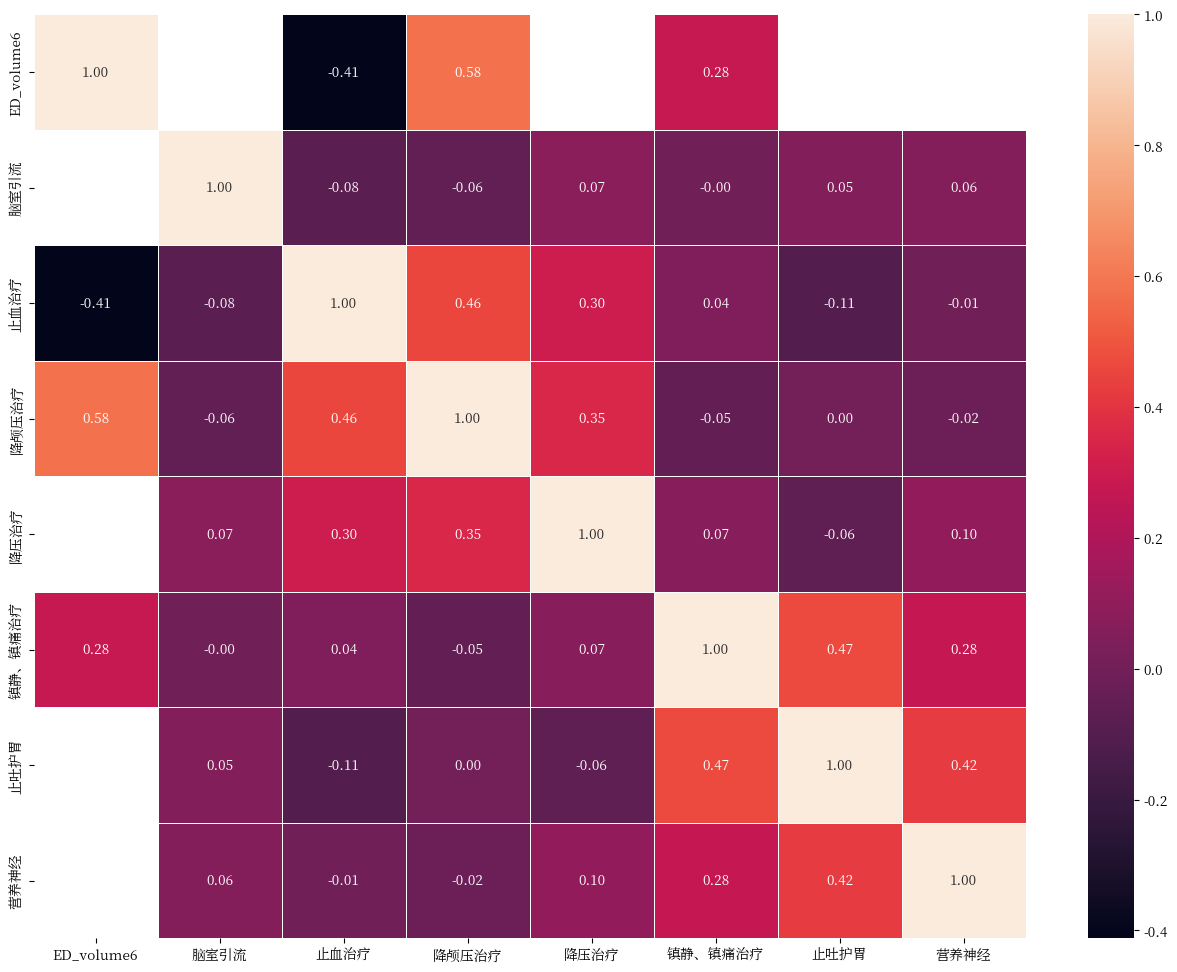

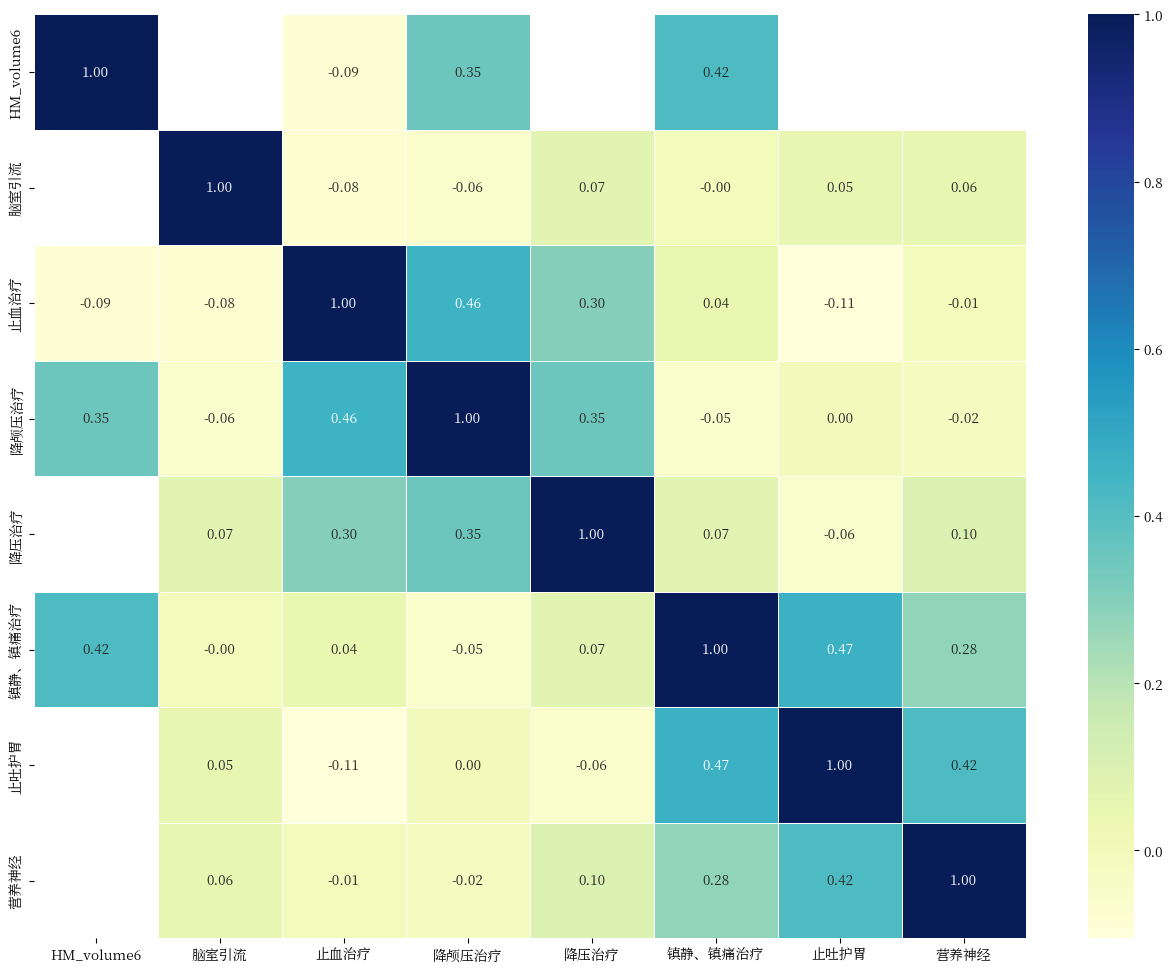

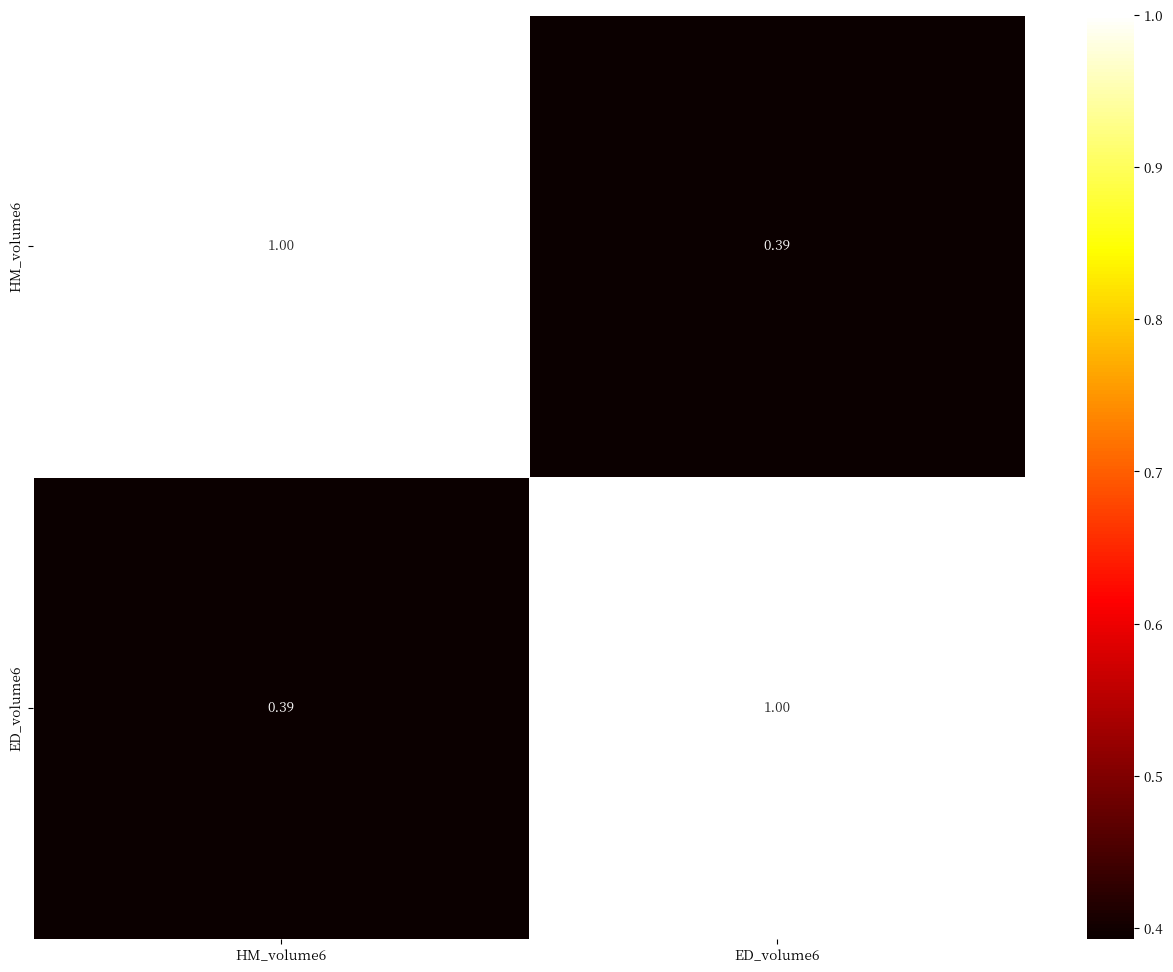

In [102]:
spearman_corr = filtered_data_corrected[['ED_volume6', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", linewidths=0.5)

# 治疗方式与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume6', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# ED_volume与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume6', 'ED_volume6']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, cmap="hot", annot=True, fmt=".2f", linewidths=0.5)

<Axes: >

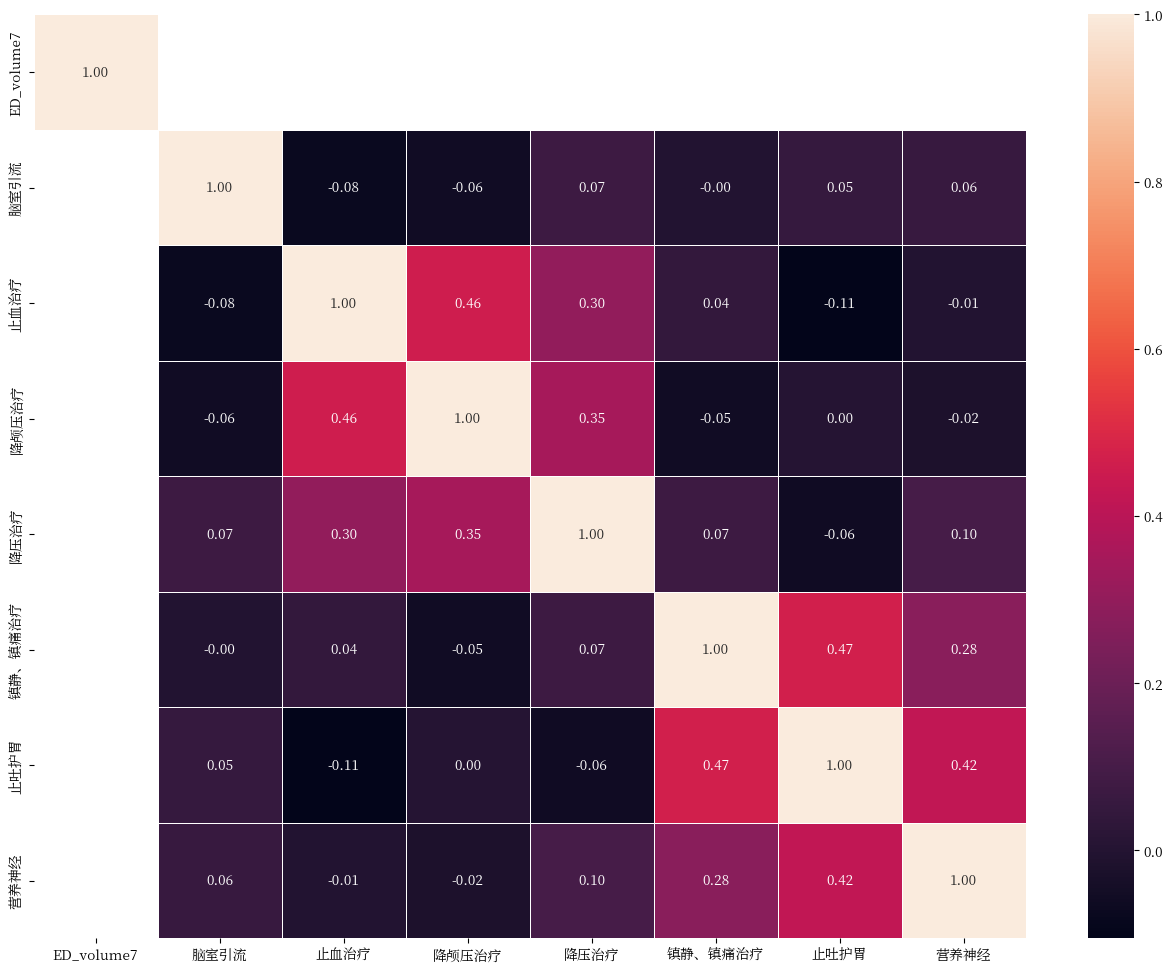

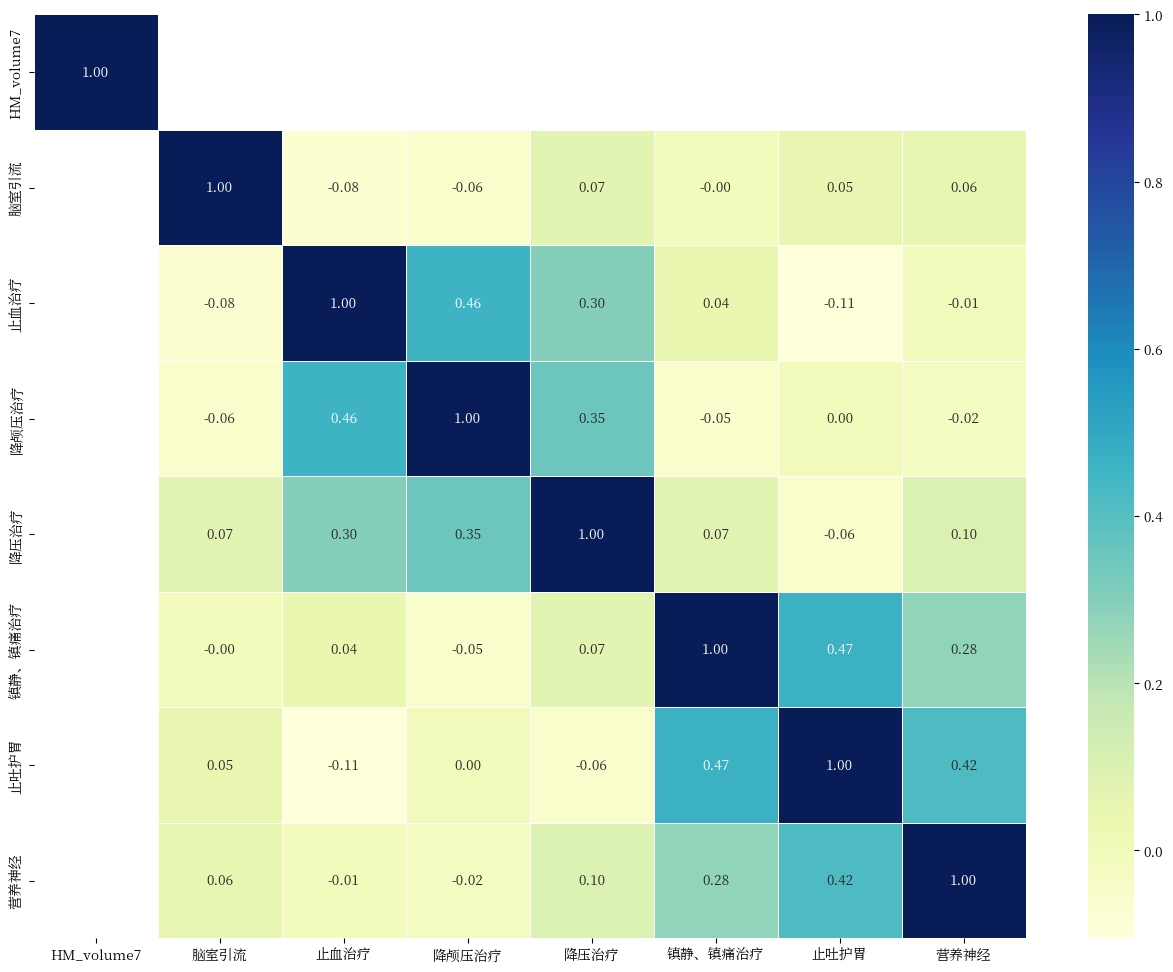

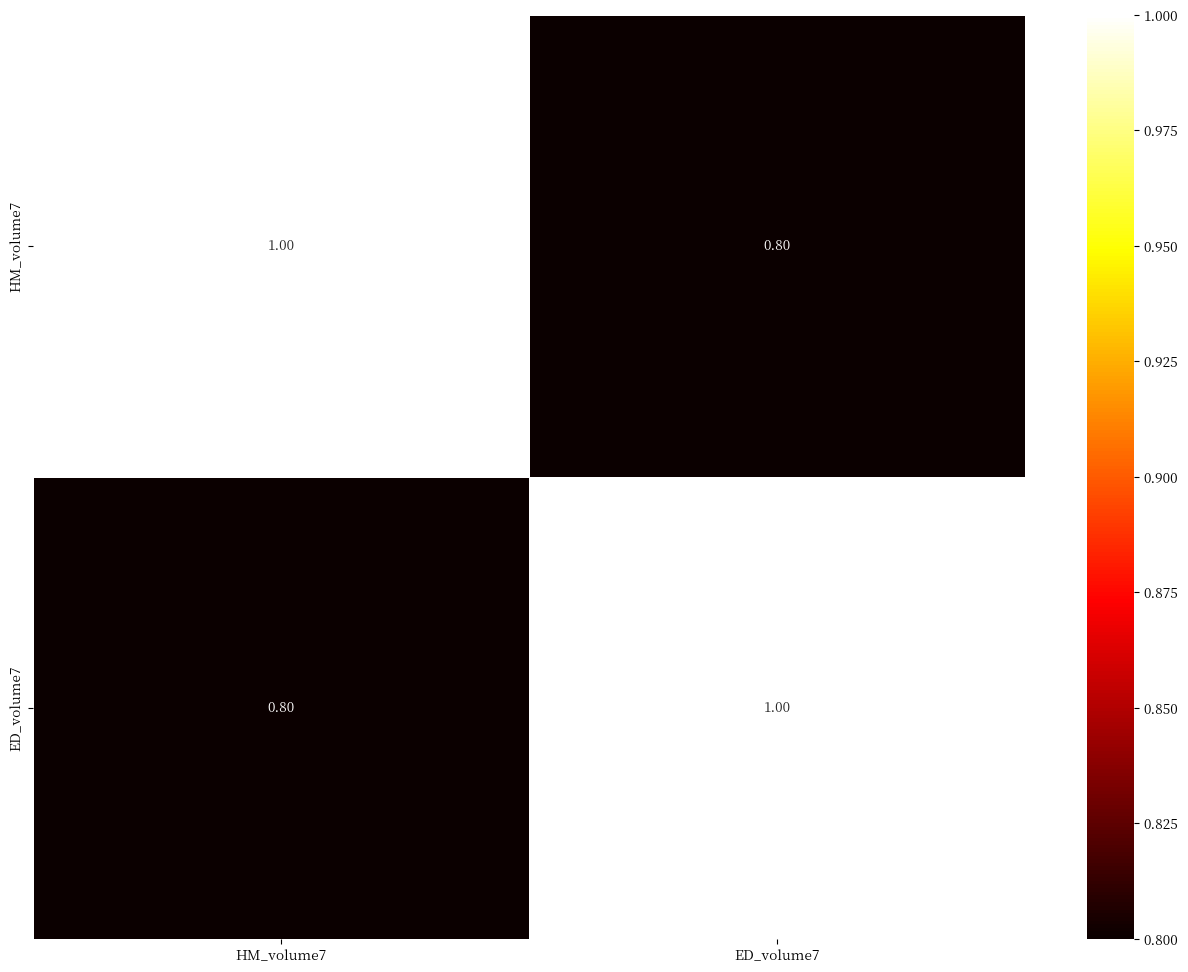

In [103]:
spearman_corr = filtered_data_corrected[['ED_volume7', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", linewidths=0.5)

# 治疗方式与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume7', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# ED_volume与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume7', 'ED_volume7']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, cmap="hot", annot=True, fmt=".2f", linewidths=0.5)

<Axes: >

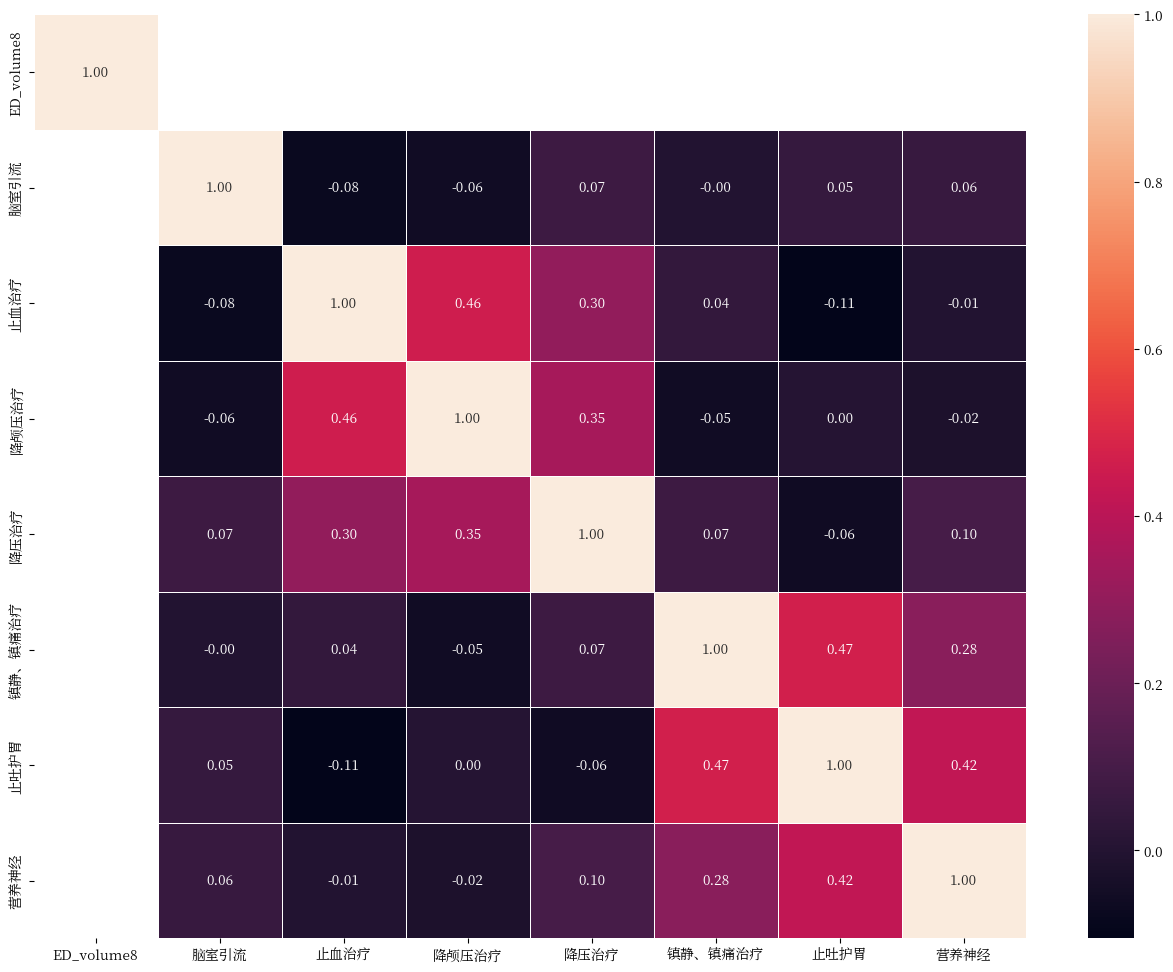

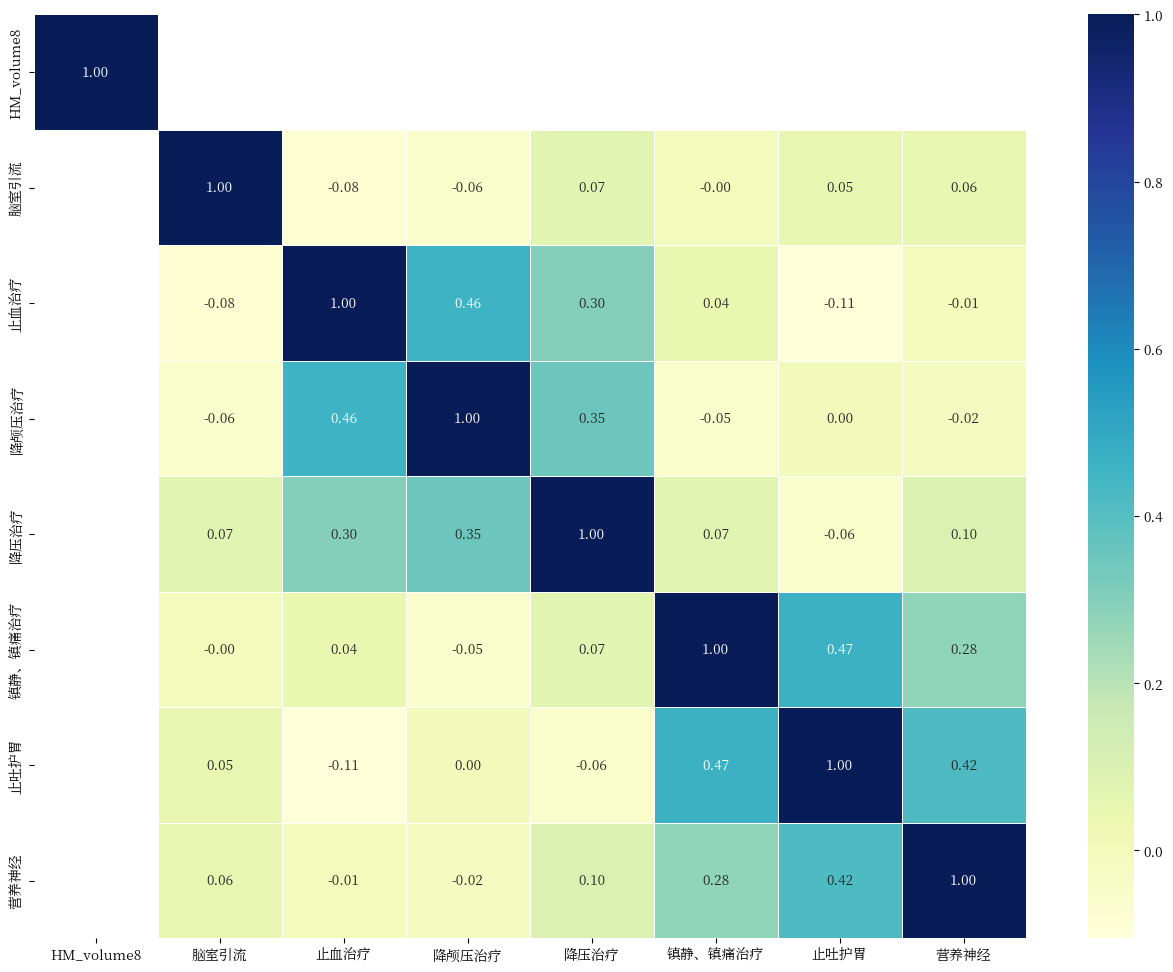

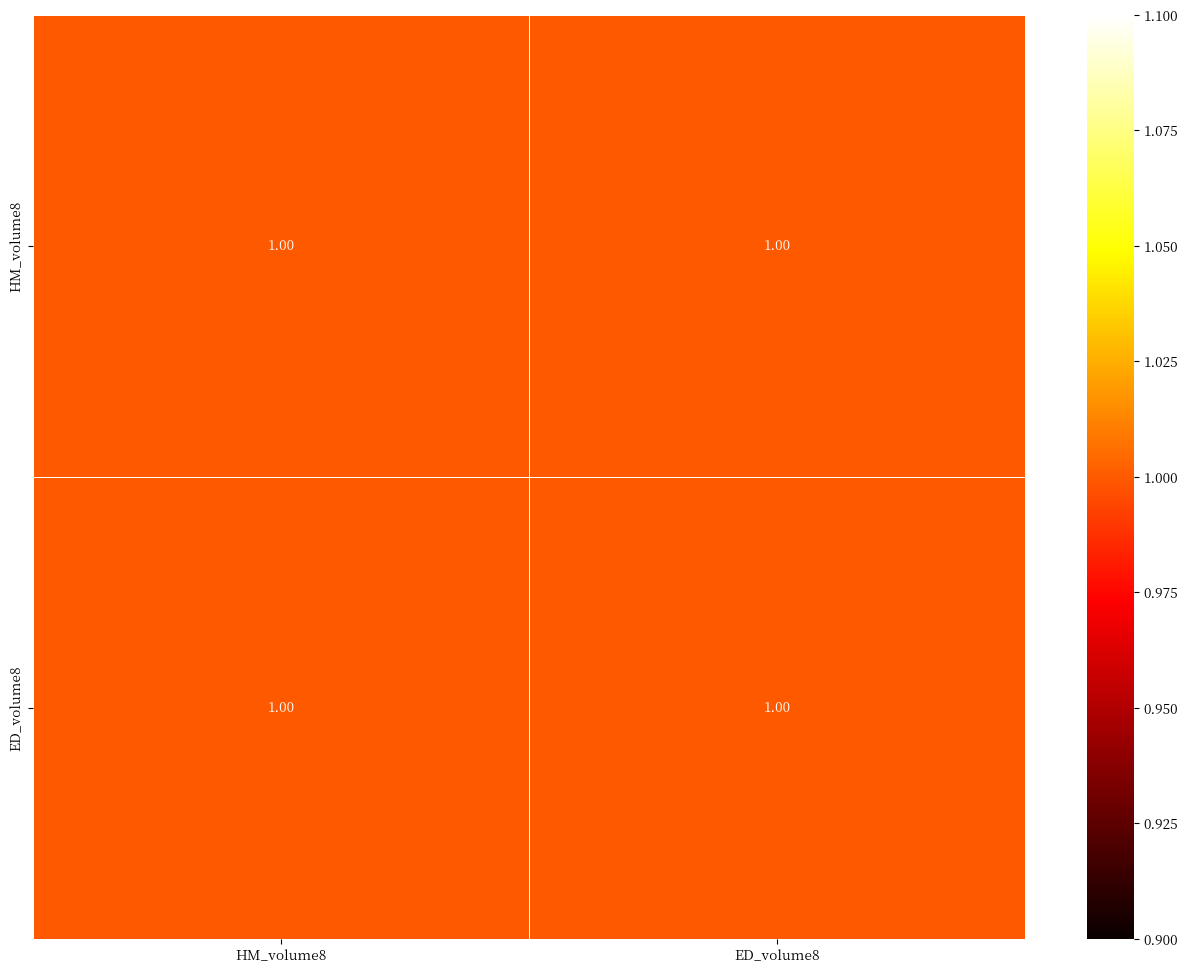

In [104]:
spearman_corr = filtered_data_corrected[['ED_volume8', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", linewidths=0.5)

# 治疗方式与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume8', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr,cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# ED_volume与HM_volume相关性
spearman_corr = filtered_data_corrected[['HM_volume8', 'ED_volume8']].corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, cmap="hot", annot=True, fmt=".2f", linewidths=0.5)